In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pymc3 as pm
import arviz as az

sns.set()


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
meta_df = pd.read_excel('mortality_org.xlsx',sheet_name='Description',skiprows=21,usecols=[1,8])
meta_df.dropna(inplace=True)
meta_df

,Country code,Available years (week.year)
0,AUS,01.2015 -34.2020
1,AUT,01.2000 -48.2020
2,BEL,01.2000 -47.2020
3,BGR,01.2010 -48.2020
4,CAN,01.2010 -38.2020
5,CHE,01.2000 -47.2020
6,CHL,01.2016 -48.2020
7,CZE,01.2005 -44.2020
8,DEUTNP,01.2016 -45.2020
9,DNK,01.2007 -48.2020


In [3]:
nordic_abbs = ['SWE','FIN','NOR','DNK','ISL']

#must fix explicit ref's to countries below, e.g. swe,fin,nor etc before using other countries
#high_hit_abbs = ['SWE','BEL','ESP','ITA','GBRTENW','USA']

abbs = nordic_abbs

In [4]:
df = pd.DataFrame()

for a in abbs:
    temp = pd.read_excel('mortality_org.xlsx',sheet_name=a,skiprows=2)
    
    df = pd.concat([df,temp],axis=0)

In [5]:
# the col Total.1 represents mortality, and is obtained by dividing Total with population and mult by 52

df

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,0-14.1,15-64.1,65-74.1,75-84.1,85+.1,Total.1,Split,SplitSex,Forecast
0,SWE,2000,1,m,7,146,216,412,371,1152,0.000434,0.002619,0.032464,0.088995,0.308656,0.013655,0,0,0
1,SWE,2000,1,f,5,91,141,380,595,1212,0.000327,0.001685,0.018434,0.057516,0.219757,0.014051,0,0,0
2,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070486,0.247089,0.013855,0,0,0
3,SWE,2000,2,m,6,142,192,403,325,1068,0.000372,0.002547,0.028857,0.087051,0.270386,0.012660,0,0,0
4,SWE,2000,2,f,3,80,116,380,585,1164,0.000196,0.001482,0.015165,0.057516,0.216064,0.013494,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,ISL,2020,43,f,0,1,3,6,9,19,0.000000,0.000452,0.010045,0.037803,0.117780,0.005632,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1
3249,ISL,2020,44,m,0,3,8,9,9,29,0.000000,0.001258,0.026644,0.062482,0.184984,0.008185,0,0,1
3250,ISL,2020,44,f,0,1,4,9,12,26,0.000000,0.000452,0.013393,0.056705,0.157040,0.007707,0,0,1


In [6]:
df_2020 = (df[(df.loc[:,'Sex'] == 'b') & (df['Year'] == 2020)]).copy()

df_2020.rename(columns={'0-14.1': 'age_grp_0-14','15-64.1' : 'age_grp_15-64',
                      '65-74.1' : 'age_grp_65-74', '75-84.1' : 'age_grp_75-84',
                      '85+.1' : 'age_grp_85+','Total.1' : 'all_age_grp'},inplace=True)
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
3242,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
3245,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [7]:
df_timeline = (df[(df.loc[:,'Sex'] == 'b')]).copy()
df_timeline.rename(columns={'0-14.1': 'age_grp_0-14','15-64.1' : 'age_grp_15-64',
                      '65-74.1' : 'age_grp_65-74', '75-84.1' : 'age_grp_75-84',
                      '85+.1' : 'age_grp_85+','Total.1' : 'all_age_grp'},inplace=True)
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070486,0.247089,0.013855,0,0,0
5,SWE,2000,2,b,9,222,308,783,910,2232,0.000286,0.002023,0.021535,0.069685,0.232765,0.013082,0,0,0
8,SWE,2000,3,b,11,232,289,724,837,2093,0.000350,0.002114,0.020206,0.064434,0.214093,0.012267,0,0,0
11,SWE,2000,4,b,7,230,295,724,831,2087,0.000223,0.002096,0.020626,0.064434,0.212558,0.012232,0,0,0
14,SWE,2000,5,b,6,248,316,703,743,2016,0.000191,0.002260,0.022094,0.062565,0.190049,0.011816,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
3242,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
3245,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [8]:
def year_week_2_date(y,w):
    return pd.to_datetime(str(y) + ' ' + str(w) + ' 0',format='%Y %W %w')


df_timeline.index = df_timeline.apply(lambda row : year_week_2_date(row.Year,row.Week),axis=1)
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2000-01-09,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070486,0.247089,0.013855,0,0,0
2000-01-16,SWE,2000,2,b,9,222,308,783,910,2232,0.000286,0.002023,0.021535,0.069685,0.232765,0.013082,0,0,0
2000-01-23,SWE,2000,3,b,11,232,289,724,837,2093,0.000350,0.002114,0.020206,0.064434,0.214093,0.012267,0,0,0
2000-01-30,SWE,2000,4,b,7,230,295,724,831,2087,0.000223,0.002096,0.020626,0.064434,0.212558,0.012232,0,0,0
2000-02-06,SWE,2000,5,b,6,248,316,703,743,2016,0.000191,0.002260,0.022094,0.062565,0.190049,0.011816,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
2020-10-18,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
2020-10-25,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
2020-11-01,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [9]:
country_grp = df_timeline.groupby('Country')
swe = country_grp.get_group('SWE').resample('Y').mean().loc['2000-01-01' :]
fin = country_grp.get_group('FIN').resample('Y').mean().loc['2000-01-01' :]
den = country_grp.get_group('DNK').resample('Y').mean().loc['2000-01-01' :]
nor = country_grp.get_group('NOR').resample('Y').mean().loc['2000-01-01' :]
isl = country_grp.get_group('ISL').resample('Y').mean().loc['2000-01-01' :]

swe

,Year,Week,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2000-12-31,2000.000000,26.500000,9.384615,230.057692,263.730769,605.076923,647.942308,1756.192308,0.000299,0.002096,0.018440,0.053850,0.165735,0.010293,0.0,0.0,0.000000
2001-12-31,2001.000000,26.500000,10.000000,229.884615,259.365385,601.000000,667.480769,1767.730769,0.000320,0.002082,0.018232,0.053377,0.168277,0.010332,0.0,0.0,0.000000
2002-12-31,2002.000000,26.000000,9.450980,227.019608,256.372549,603.254902,688.529412,1784.627451,0.000304,0.002043,0.018034,0.053649,0.171497,0.010397,0.0,0.0,0.000000
2003-12-31,2002.980769,26.500000,9.096154,227.557692,253.134615,592.403846,673.923077,1756.115385,0.000295,0.002034,0.017709,0.052858,0.166186,0.010194,0.0,0.0,0.000000
2004-12-31,2003.980769,26.500000,9.115385,229.634615,245.288462,567.134615,661.038462,1712.211538,0.000298,0.002039,0.016972,0.050636,0.161090,0.009900,0.0,0.0,0.000000
2005-12-31,2004.980769,26.500000,8.326923,235.269231,245.884615,564.807692,688.230769,1742.519231,0.000276,0.002074,0.016765,0.051093,0.160886,0.010035,0.0,0.0,0.000000
2006-12-31,2005.981132,26.981132,8.943396,234.132075,241.867925,544.320755,708.283019,1737.547170,0.000299,0.002044,0.016294,0.049850,0.158752,0.009950,0.0,0.0,0.000000
2007-12-31,2007.000000,26.500000,8.096154,232.961538,239.557692,531.653846,734.076923,1746.346154,0.000273,0.002015,0.015684,0.049253,0.159894,0.009925,0.0,0.0,0.000000
2008-12-31,2008.000000,26.000000,7.921569,233.235294,241.705882,510.901961,736.901961,1730.666667,0.000267,0.002003,0.015183,0.047732,0.158050,0.009759,0.0,0.0,0.000000
2009-12-31,2008.980769,26.500000,9.000000,226.403846,248.615385,497.807692,739.500000,1721.326923,0.000303,0.001934,0.014879,0.046918,0.156219,0.009627,0.0,0.0,0.000000


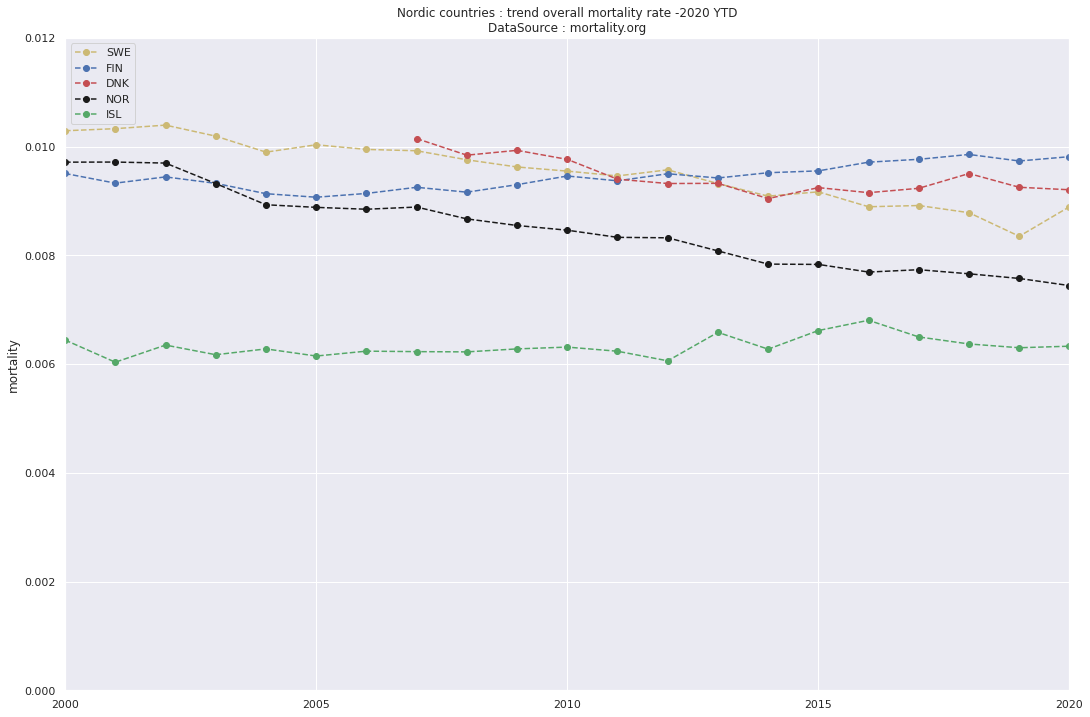

In [10]:
title = 'Nordic countries : trend overall mortality rate -2020 YTD\nDataSource : mortality.org'

ax = swe['all_age_grp'].plot(style='yo--',figsize=(18,12),label='SWE',title=title)
fin['all_age_grp'].plot(style='bo--',ax=ax,label='FIN')
den['all_age_grp'].plot(style='ro--',ax=ax,label='DNK')
nor['all_age_grp'].plot(style='ko--',ax=ax,label='NOR')
isl['all_age_grp'].plot(style='go--',ax=ax,label='ISL')

ax.set_ylabel('mortality')

ax.set_ylim([0,0.012])
plt.legend(loc='upper left')
plt.savefig('nordic_mortality_trend.jpg',format='jpg')

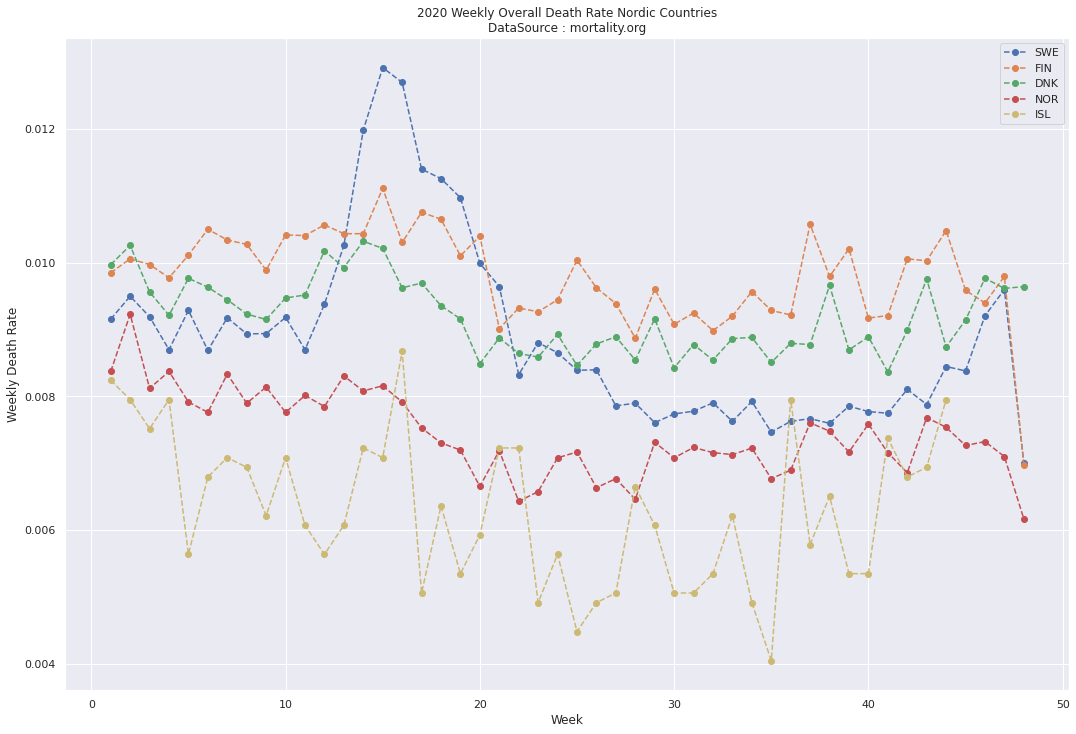

In [11]:
swe_2020 = df_2020.loc[df_2020['Country'] == 'SWE']
fin_2020 = df_2020.loc[df_2020['Country'] == 'FIN']
den_2020 = df_2020.loc[df_2020['Country'] == 'DNK']
nor_2020 = df_2020.loc[df_2020['Country'] == 'NOR']
isl_2020 = df_2020.loc[df_2020['Country'] == 'ISL']

ax = swe_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='SWE',figsize=(18,12),
             title='2020 Weekly Overall Death Rate Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='FIN',ax=ax)
den_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='DNK',ax=ax)
nor_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='NOR',ax=ax)
isl_2020.plot(x='Week',y='all_age_grp',style=['yo--'],label='ISL',ax=ax)



plt.ylabel('Weekly Death Rate')
plt.savefig('mortality_org_overall_death_rate_nor_2020dics.jpg',format='jpg')

In [12]:
swe_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
3137,SWE,2020,6,b,9,183,258,493,785,1728,0.000255,0.001481,0.012257,0.035536,0.154071,0.008688,0,0,1
3140,SWE,2020,7,b,5,174,278,532,836,1825,0.000142,0.001408,0.013207,0.038347,0.164081,0.009176,0,0,1
3143,SWE,2020,8,b,3,178,271,537,788,1777,0.000085,0.001440,0.012875,0.038707,0.154660,0.008935,0,0,1
3146,SWE,2020,9,b,10,177,264,533,794,1778,0.000283,0.001432,0.012542,0.038419,0.155837,0.008940,0,0,1
3149,SWE,2020,10,b,7,183,296,557,783,1826,0.000198,0.001481,0.014062,0.040149,0.153678,0.009181,0,0,1


In [13]:
swe_2020['age_grp_85+'] 

3122    0.159566
3125    0.174483
3128    0.166828
3131    0.145043
3134    0.162903
3137    0.154071
3140    0.164081
3143    0.154660
3146    0.155837
3149    0.153678
3152    0.154464
3155    0.165847
3158    0.174090
3161    0.205493
3164    0.234149
3167    0.228064
3170    0.206082
3173    0.202746
3176    0.193325
3179    0.174287
3182    0.170165
3185    0.146613
3188    0.146220
3191    0.140725
3194    0.138369
3197    0.149753
3200    0.129537
3203    0.129537
3206    0.131304
3209    0.136014
3212    0.122472
3215    0.134640
3218    0.125023
3221    0.133855
3224    0.124042
3227    0.126397
3230    0.129734
3233    0.126986
3236    0.135818
3239    0.127575
3242    0.127771
3245    0.137584
3248    0.136603
3251    0.147202
3254    0.139940
3257    0.162707
3260    0.166240
3263    0.125808
Name: age_grp_85+, dtype: float64

Text(0, 0.5, 'Weekly Death Rate')

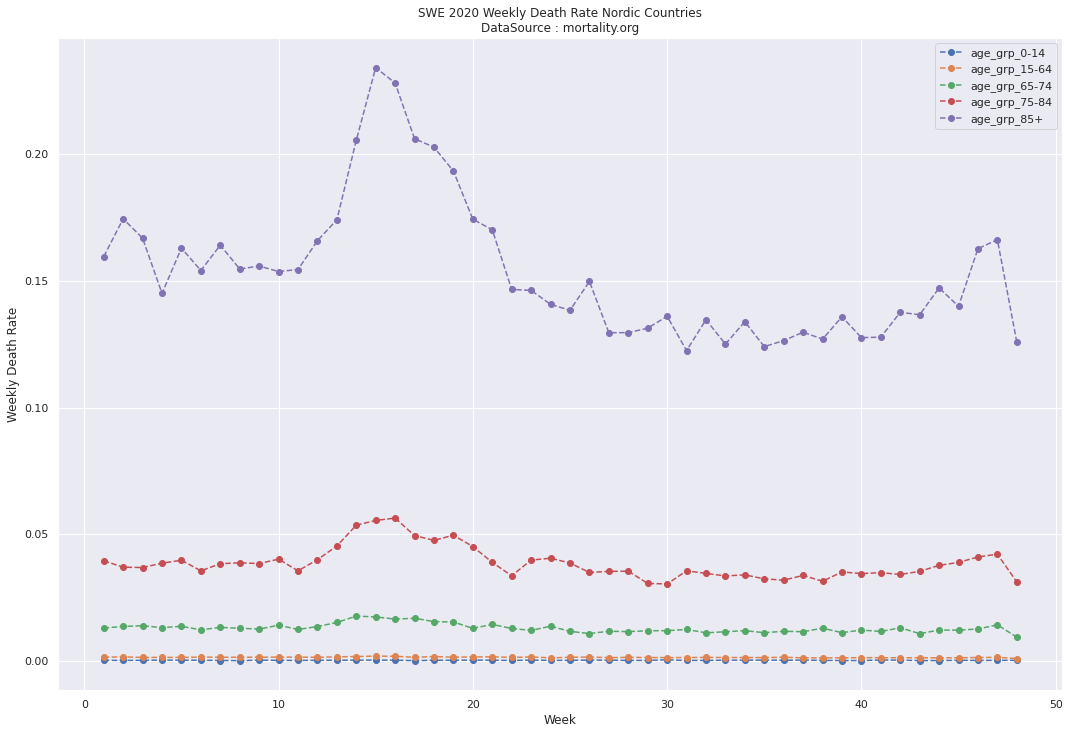

In [14]:
ax = swe_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='SWE 2020 Weekly Death Rate Nordic Countries\nDataSource : mortality.org')

plt.ylabel('Weekly Death Rate')

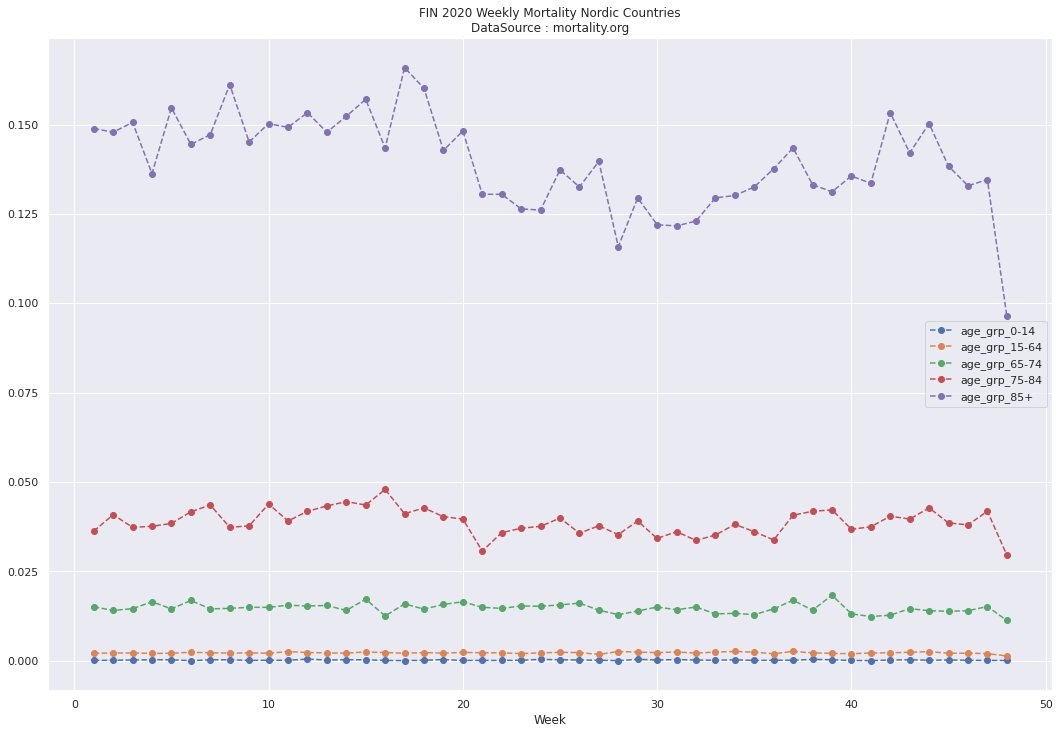

In [15]:
ax = fin_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='FIN 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

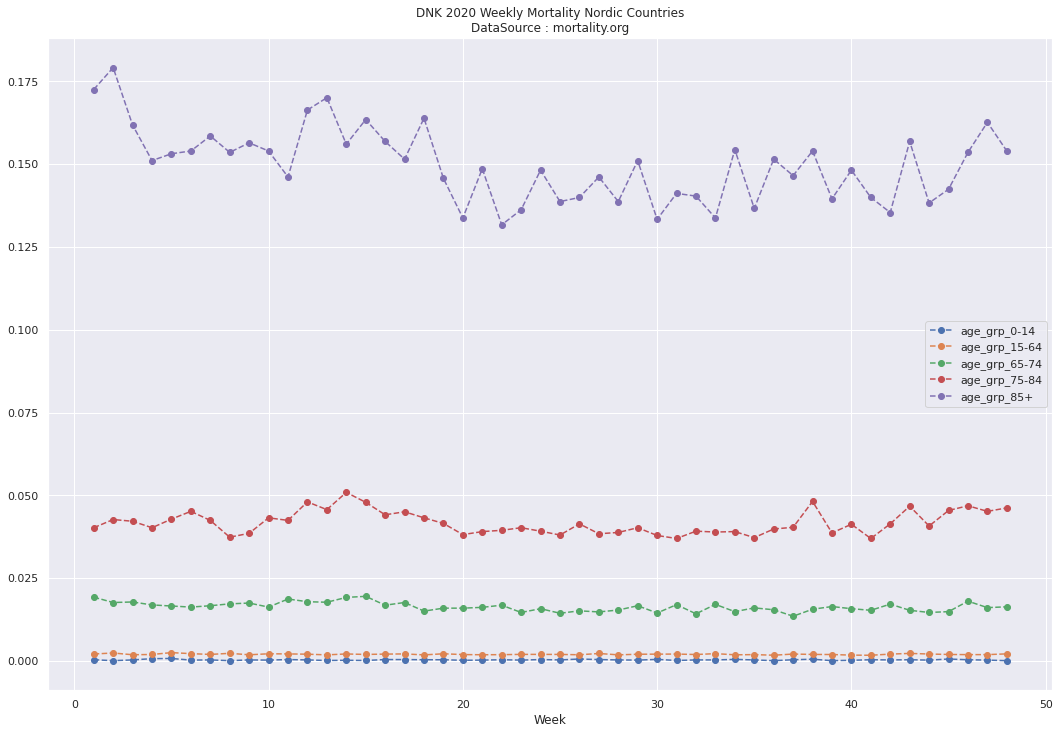

In [16]:
ax = den_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='DNK 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

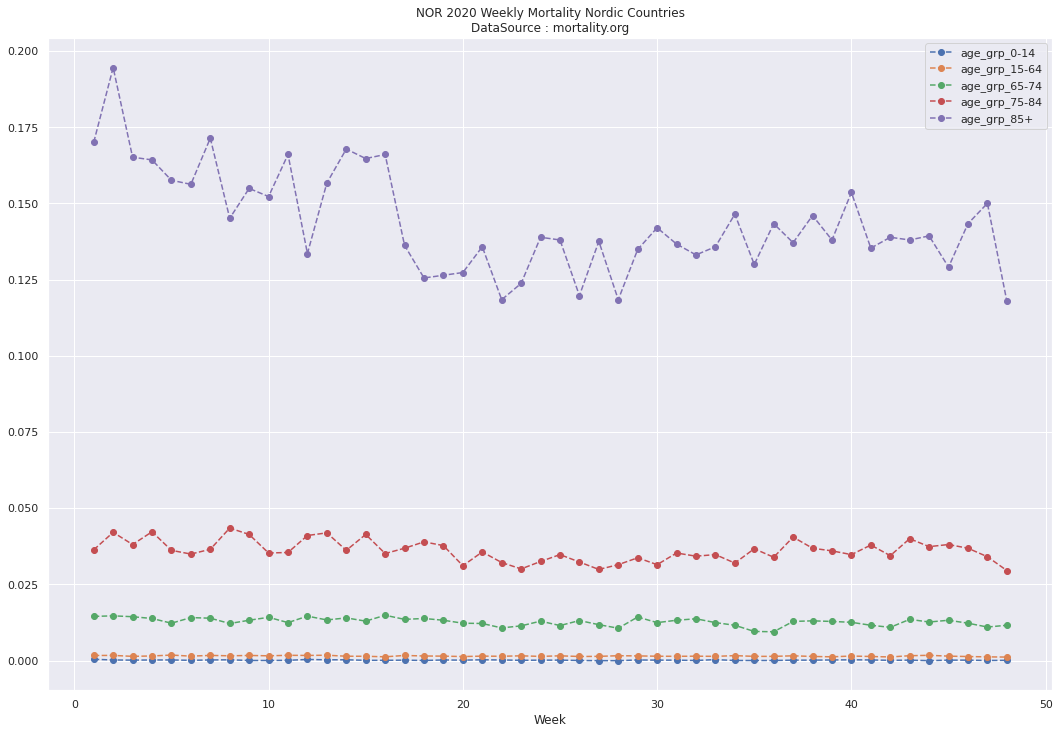

In [17]:
ax = nor_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='NOR 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

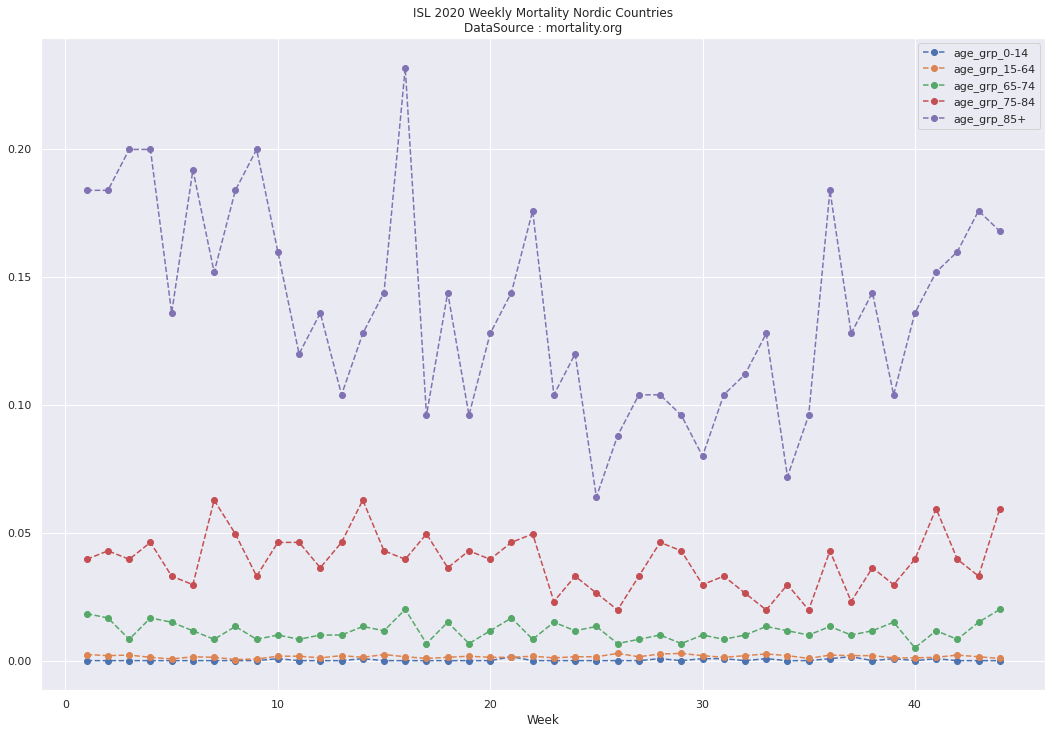

In [18]:
ax = isl_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='ISL 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

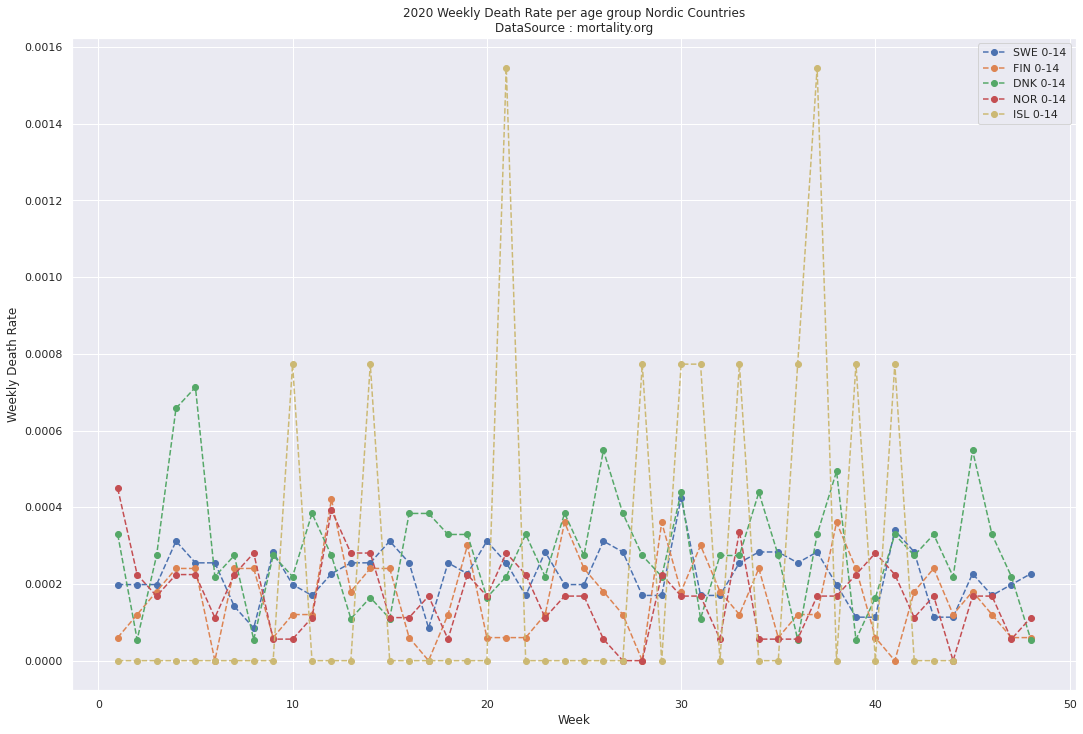

In [19]:
ax = swe_2020.plot(x='Week',y='age_grp_0-14',style='o--',figsize=(18,12),label='SWE 0-14',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='FIN 0-14')
den_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='DNK 0-14')
nor_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='NOR 0-14')
isl_2020.plot(x='Week',y='age_grp_0-14',style='yo--',ax=ax,label='ISL 0-14')

plt.ylabel('Weekly Death Rate')
plt.savefig ('mortality_org_0_14.jpg',format='jpg')

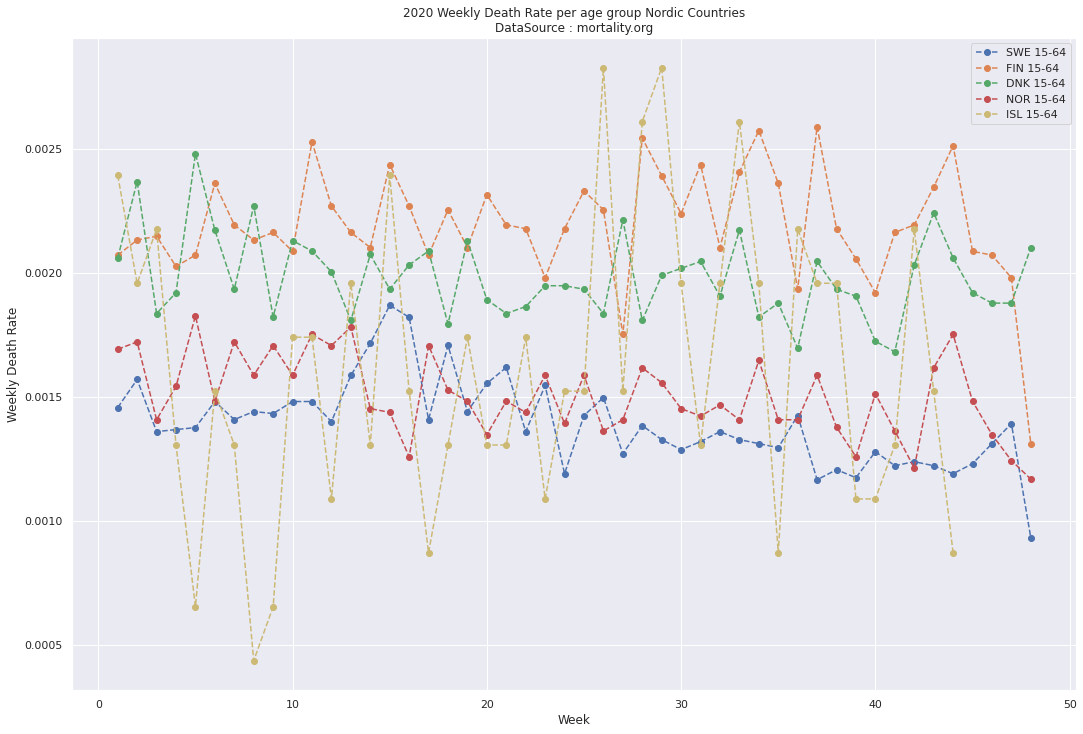

In [20]:
ax = swe_2020.plot(x='Week',y='age_grp_15-64',style='o--',figsize=(18,12),label='SWE 15-64',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='FIN 15-64')
den_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='DNK 15-64')
nor_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='NOR 15-64')
isl_2020.plot(x='Week',y='age_grp_15-64',style='yo--',ax=ax,label='ISL 15-64')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_15_64.jpg',format='jpg')

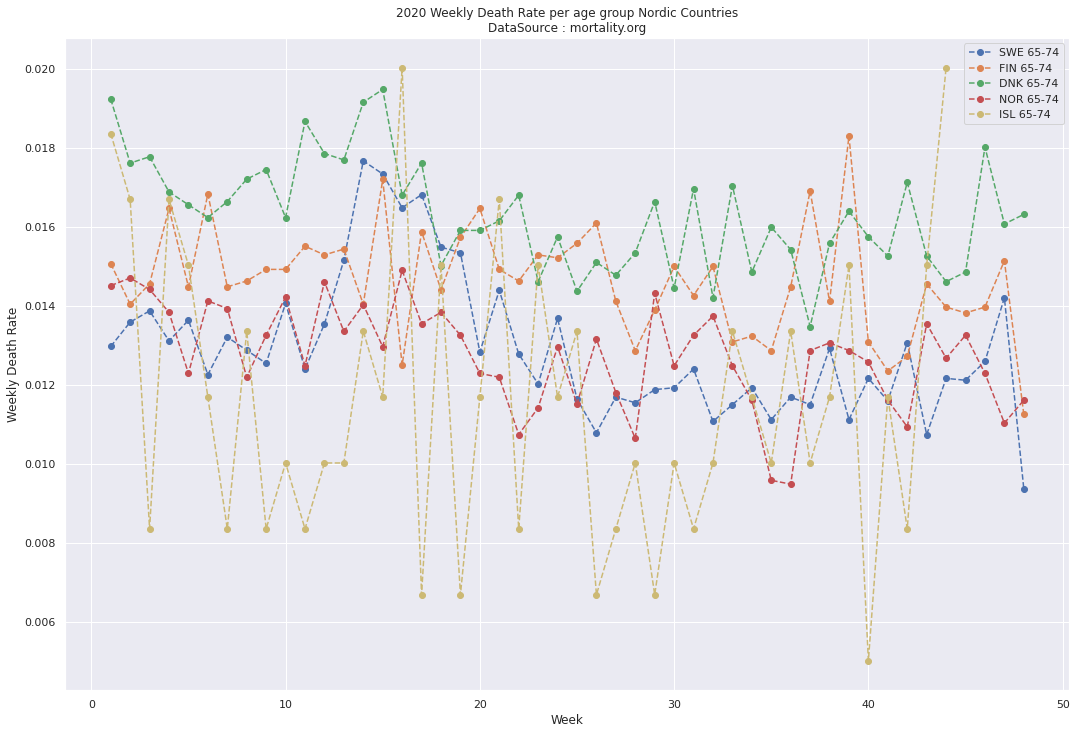

In [21]:
ax = swe_2020.plot(x='Week',y='age_grp_65-74',style='o--',figsize=(18,12),label='SWE 65-74',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='FIN 65-74')
den_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='DNK 65-74')
nor_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='NOR 65-74')
isl_2020.plot(x='Week',y='age_grp_65-74',style='yo--',ax=ax,label='ISL 65-74')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_65_74.jpg',format='jpg')

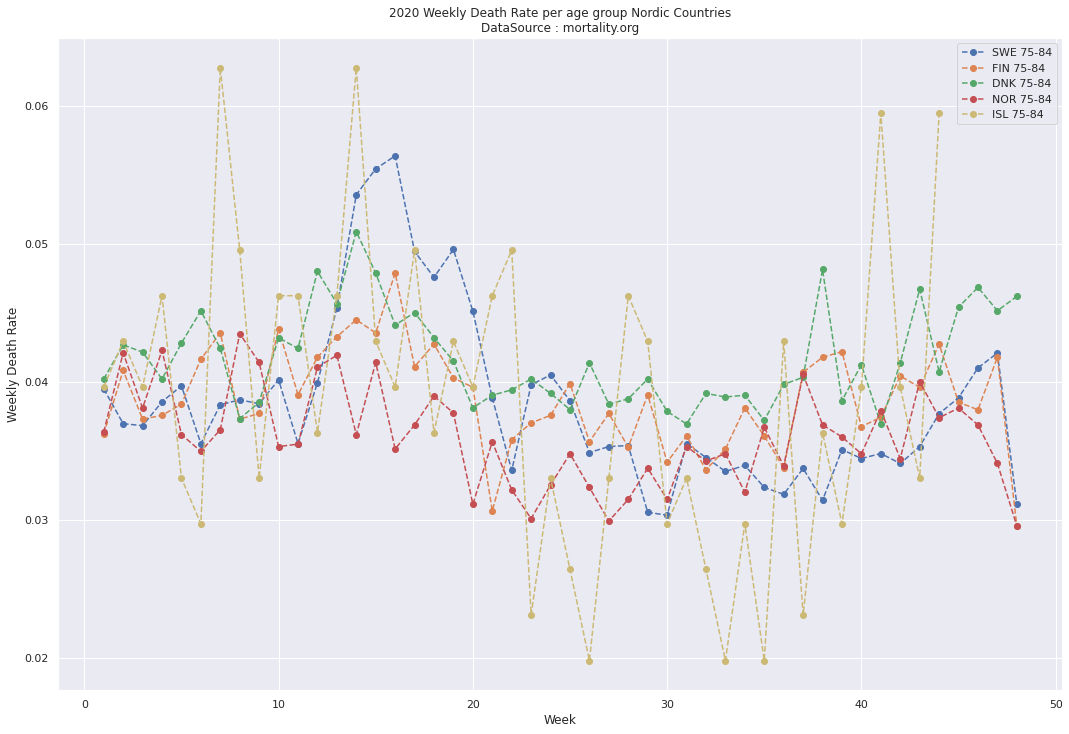

In [22]:
ax = swe_2020.plot(x='Week',y='age_grp_75-84',style='o--',figsize=(18,12),label='SWE 75-84',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='FIN 75-84')
den_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='DNK 75-84')
nor_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='NOR 75-84')
isl_2020.plot(x='Week',y='age_grp_75-84',style='yo--',ax=ax,label='ISL 75-84')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_75_84.jpg',format='jpg')

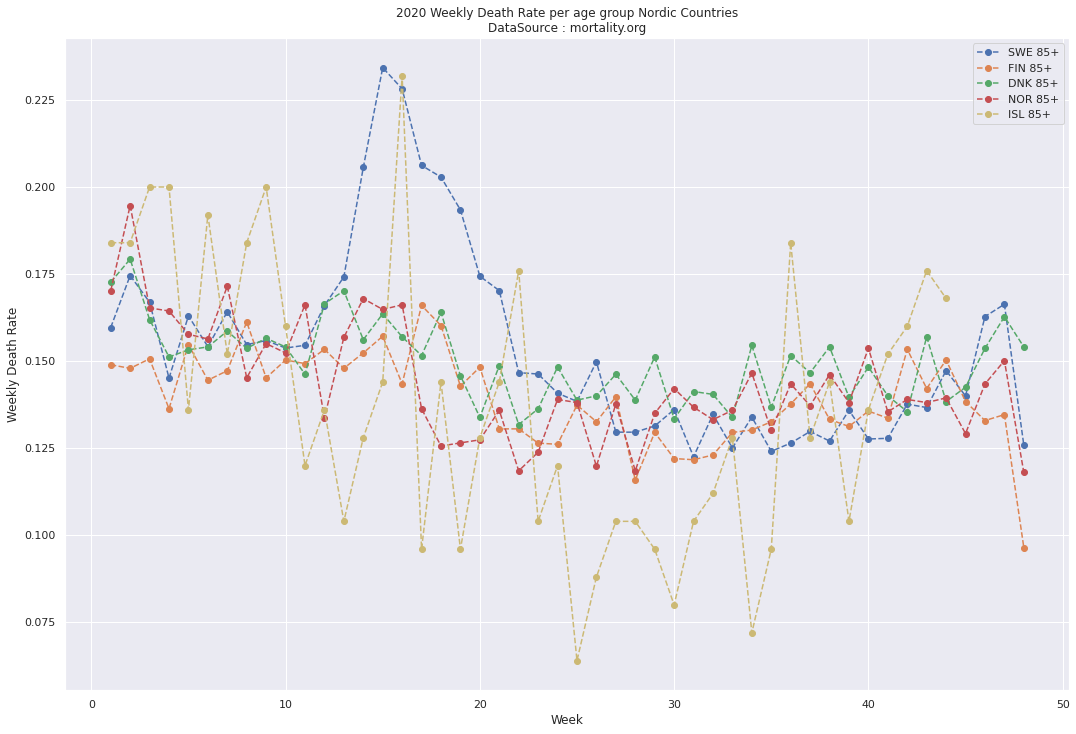

In [23]:
ax = swe_2020.plot(x='Week',y='age_grp_85+',style='o--',figsize=(18,12),label='SWE 85+',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='FIN 85+')
den_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='DNK 85+')
nor_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='NOR 85+')
isl_2020.plot(x='Week',y='age_grp_85+',style='yo--',ax=ax,label='ISL 85+')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_85+.jpg',format='jpg')

In [24]:
swe_2020['all_age_grp']

3122    0.009156
3125    0.009498
3128    0.009191
3131    0.008698
3134    0.009287
3137    0.008688
3140    0.009176
3143    0.008935
3146    0.008940
3149    0.009181
3152    0.008698
3155    0.009377
3158    0.010257
3161    0.011982
3164    0.012917
3167    0.012696
3170    0.011398
3173    0.011258
3176    0.010971
3179    0.009991
3182    0.009644
3185    0.008326
3188    0.008804
3191    0.008653
3194    0.008392
3197    0.008397
3200    0.007859
3203    0.007899
3206    0.007607
3209    0.007738
3212    0.007778
3215    0.007904
3218    0.007627
3221    0.007924
3224    0.007467
3227    0.007627
3230    0.007668
3233    0.007597
3236    0.007854
3239    0.007773
3242    0.007748
3245    0.008105
3248    0.007879
3251    0.008447
3254    0.008382
3257    0.009206
3260    0.009598
3263    0.007004
Name: all_age_grp, dtype: float64

In [25]:
swe_2020['Total'].sum() / (10.23e6 * len(swe_2020)/52)



0.008997596937113066

In [26]:
swe_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
3137,SWE,2020,6,b,9,183,258,493,785,1728,0.000255,0.001481,0.012257,0.035536,0.154071,0.008688,0,0,1
3140,SWE,2020,7,b,5,174,278,532,836,1825,0.000142,0.001408,0.013207,0.038347,0.164081,0.009176,0,0,1
3143,SWE,2020,8,b,3,178,271,537,788,1777,0.000085,0.001440,0.012875,0.038707,0.154660,0.008935,0,0,1
3146,SWE,2020,9,b,10,177,264,533,794,1778,0.000283,0.001432,0.012542,0.038419,0.155837,0.008940,0,0,1
3149,SWE,2020,10,b,7,183,296,557,783,1826,0.000198,0.001481,0.014062,0.040149,0.153678,0.009181,0,0,1


In [27]:
swe_2020['Total'] / 10.23e6 *52

3122    0.009256
3125    0.009602
3128    0.009292
3131    0.008794
3134    0.009388
3137    0.008784
3140    0.009277
3143    0.009033
3146    0.009038
3149    0.009282
3152    0.008794
3155    0.009480
3158    0.010370
3161    0.012113
3164    0.013058
3167    0.012835
3170    0.011523
3173    0.011381
3176    0.011091
3179    0.010100
3182    0.009749
3185    0.008418
3188    0.008900
3191    0.008748
3194    0.008484
3197    0.008489
3200    0.007945
3203    0.007986
3206    0.007691
3209    0.007823
3212    0.007864
3215    0.007991
3218    0.007711
3221    0.008011
3224    0.007548
3227    0.007711
3230    0.007752
3233    0.007681
3236    0.007940
3239    0.007858
3242    0.007833
3245    0.008194
3248    0.007965
3251    0.008540
3254    0.008474
3257    0.009307
3260    0.009704
3263    0.007081
Name: Total, dtype: float64

In [28]:
def age_grp_mean(col):
    return col.mean()

age_grp_mean(swe_2020['age_grp_0-14'])
age_grp_mean(swe_2020['age_grp_15-64'])
age_grp_mean(swe_2020['age_grp_65-74'])
age_grp_mean(swe_2020['age_grp_75-84'])
age_grp_mean(swe_2020['age_grp_85+'])

0.1537152309505118

In [29]:
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
3242,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
3245,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


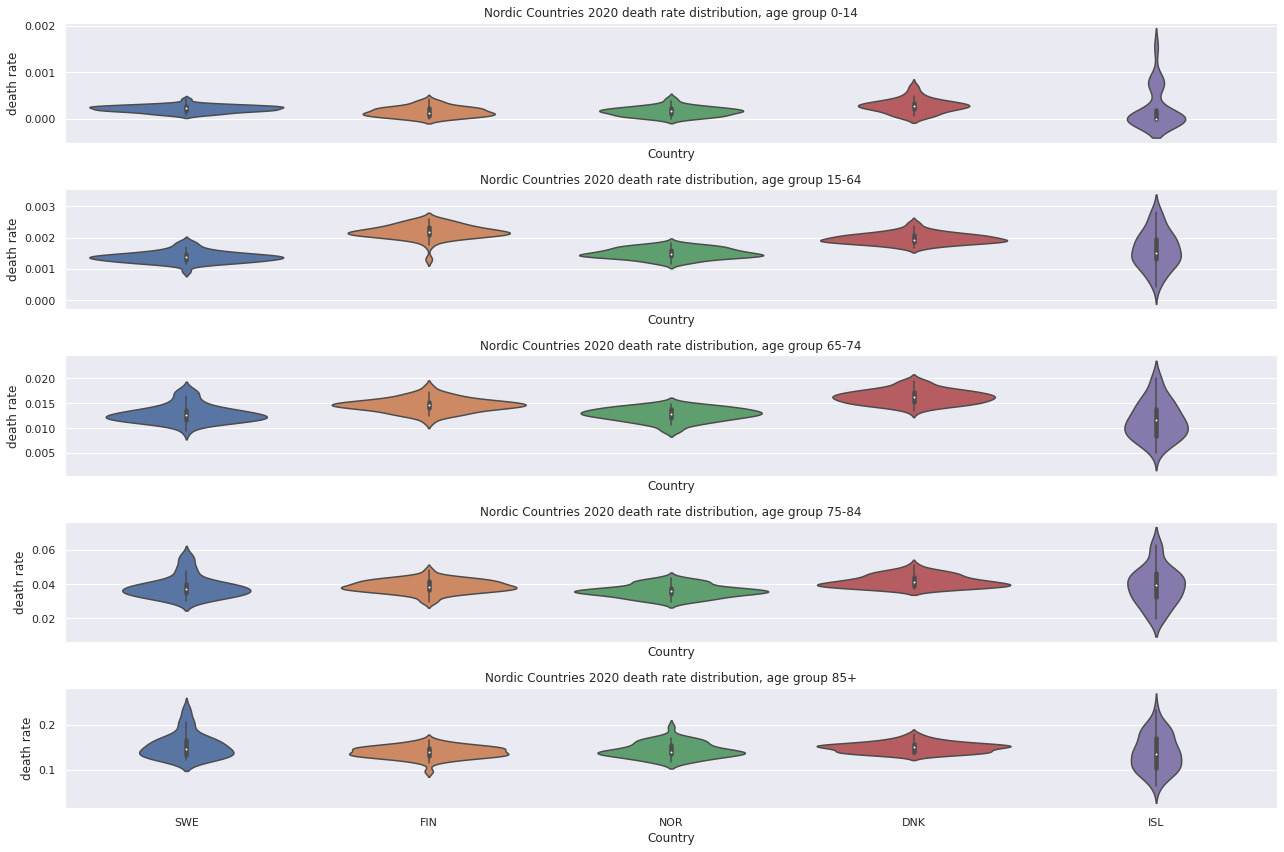

In [30]:
fig,axes = plt.subplots(5,1,figsize=(18,12),sharex=True)


title='Nordic Countries 2020 death rate distribution, age group 0-14'
sns.violinplot(x='Country',y='age_grp_0-14',data=df_2020,ax=axes[0])
axes[0].set_title(title)
axes[0].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 15-64'
sns.violinplot(x='Country',y='age_grp_15-64',data=df_2020,ax=axes[1])
axes[1].set_title(title)
axes[1].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 65-74'
sns.violinplot(x='Country',y='age_grp_65-74',data=df_2020,ax=axes[2])
axes[2].set_title(title)
axes[2].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 75-84'
sns.violinplot(x='Country',y='age_grp_75-84',data=df_2020,ax=axes[3])
axes[3].set_title(title)
axes[3].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 85+'
sns.violinplot(x='Country',y='age_grp_85+',data=df_2020,ax=axes[4])
axes[4].set_title(title)
axes[4].set_ylabel('death rate')

plt.tight_layout()

plt.savefig('nor_2020dic_death_rate_distr.jpg',format='jpg')

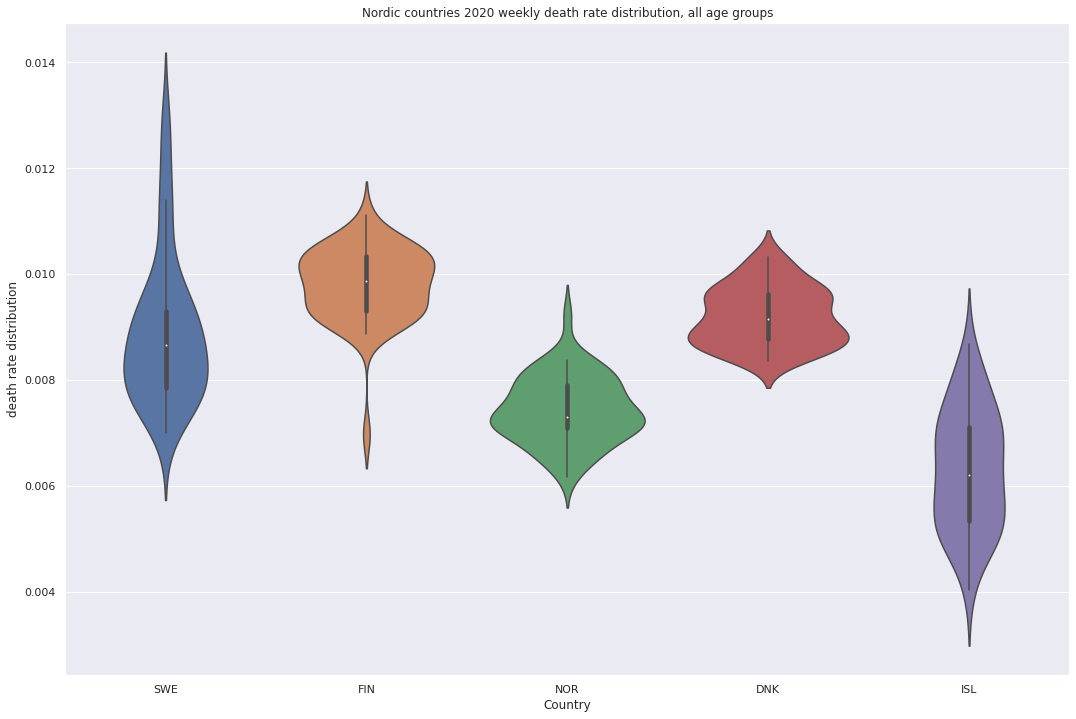

In [31]:
plt.figure(figsize=(18,12))
plt.title('Nordic countries 2020 weekly death rate distribution, all age groups')
sns.violinplot(x='Country',y='all_age_grp',data=df_2020)
plt.ylabel('death rate distribution')

plt.savefig('nor_2020dic_death_distr_all_ages.jpg',format='jpg')

In [32]:

transaction_df = df_2020[['Country','age_grp_0-14','age_grp_15-64']].copy()
#transaction_df['age_grp_0-14'].apply()

In [33]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
df_timeline = df_timeline.loc['2007-01-01' :]
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,0.000303,0.002041,0.019510,0.054102,0.181224,0.011134,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,0.000337,0.001990,0.014665,0.054936,0.178828,0.010674,0,0,0
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,0.000269,0.002119,0.015713,0.054380,0.169679,0.010566,0,0,0
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,0.000303,0.002119,0.015778,0.055862,0.167937,0.010622,0,0,0
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,0.000303,0.002301,0.016957,0.052342,0.168808,0.010651,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
2020-10-18,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
2020-10-25,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
2020-11-01,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [35]:
unique_countries = df_timeline['Country'].unique()
country_idx_map = dict(zip(unique_countries,range(len(unique_countries))))
country_idx_map

{'SWE': 0, 'FIN': 1, 'NOR': 2, 'DNK': 3, 'ISL': 4}

In [36]:
unique_dates = np.unique(df_timeline.index)
date_idx_map = dict(zip(pd.to_datetime(unique_dates),range(len(unique_dates))))


In [37]:
df_timeline['country_idx'] = df_timeline['Country'].apply(lambda x : country_idx_map[x])
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,0.000303,0.002041,0.019510,0.054102,0.181224,0.011134,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,0.000337,0.001990,0.014665,0.054936,0.178828,0.010674,0,0,0,0
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,0.000269,0.002119,0.015713,0.054380,0.169679,0.010566,0,0,0,0
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,0.000303,0.002119,0.015778,0.055862,0.167937,0.010622,0,0,0,0
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,0.000303,0.002301,0.016957,0.052342,0.168808,0.010651,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1,4
2020-10-18,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1,4
2020-10-25,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1,4
2020-11-01,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1,4


In [38]:
week_idx = df_timeline.reset_index()['index'].apply(lambda x : date_idx_map[x])

In [39]:
df_timeline['week_idx'] = week_idx.values
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,...,0.002041,0.019510,0.054102,0.181224,0.011134,0,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,...,0.001990,0.014665,0.054936,0.178828,0.010674,0,0,0,0,1
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,...,0.002119,0.015713,0.054380,0.169679,0.010566,0,0,0,0,2
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,...,0.002119,0.015778,0.055862,0.167937,0.010622,0,0,0,0,3
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,...,0.002301,0.016957,0.052342,0.168808,0.010651,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,ISL,2020,40,b,0,5,3,12,17,37,...,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1,4,715
2020-10-18,ISL,2020,41,b,1,6,7,18,19,51,...,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1,4,716
2020-10-25,ISL,2020,42,b,0,10,5,12,20,47,...,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1,4,717
2020-11-01,ISL,2020,43,b,0,7,9,10,22,48,...,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1,4,718


In [40]:
df_timeline.loc[df_timeline['Country'] == 'NOR']

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,NOR,2007,1,b,6,145,107,273,357,888,...,0.002421,0.016700,0.056342,0.177668,0.009804,0,0,0,2,0
2007-01-14,NOR,2007,2,b,2,131,104,281,389,907,...,0.002187,0.016231,0.057993,0.193593,0.010013,0,0,0,2,1
2007-01-21,NOR,2007,3,b,4,127,108,266,326,831,...,0.002121,0.016856,0.054898,0.162240,0.009174,0,0,0,2,2
2007-01-28,NOR,2007,4,b,4,123,136,253,352,868,...,0.002054,0.021226,0.052215,0.175179,0.009583,0,0,0,2,3
2007-02-04,NOR,2007,5,b,9,120,114,269,370,882,...,0.002004,0.017792,0.055517,0.184137,0.009737,0,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,NOR,2020,44,b,0,117,131,215,313,776,...,0.001752,0.012674,0.037408,0.139368,0.007538,0,0,1,2,719
2020-11-15,NOR,2020,45,b,3,99,137,219,290,748,...,0.001482,0.013255,0.038104,0.129127,0.007266,0,0,1,2,720
2020-11-22,NOR,2020,46,b,3,90,127,212,322,754,...,0.001347,0.012287,0.036886,0.143376,0.007324,0,0,1,2,721
2020-11-29,NOR,2020,47,b,1,83,114,196,337,731,...,0.001243,0.011030,0.034102,0.150055,0.007101,0,0,1,2,722


In [41]:
last_date = df_timeline.index.max().date()
last_date

datetime.date(2020, 12, 6)

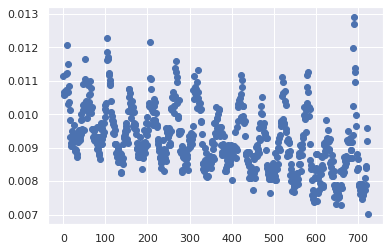

In [42]:
plt.scatter(df_timeline.loc[df_timeline['Country'] == 'SWE']['week_idx'],
            df_timeline.loc[df_timeline['Country']=='SWE']['all_age_grp'])

In [43]:

x = df_timeline['week_idx'].values
x

array([  0,   1,   2, ..., 717, 718, 719])

In [44]:
def standardize(series):
    return (series - series.mean()) / series.std()

model = pm.Model()
scale_outcome = 1000


def regression(outcome='all_age_grp'):

    week_idx = df_timeline['week_idx'].values
    country_idx = df_timeline['country_idx'].values


    
    with model:

        alpha = pm.Normal('alpha',0,1,shape=len(unique_countries))
        beta = pm.Normal('beta',0, 1,shape=len(unique_countries))

        sigma = pm.Uniform('sigma',0,5)

        mu = pm.Deterministic('mu',alpha[country_idx] + standardize(x) * beta[country_idx])

        obs = pm.Normal('obs',mu,sigma,observed=df_timeline[outcome] * scale_outcome) 

        trace = pm.sample(2000,tune=2000)
        
        return trace

In [45]:
df_timeline.head()

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,...,0.002041,0.019510,0.054102,0.181224,0.011134,0,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,...,0.001990,0.014665,0.054936,0.178828,0.010674,0,0,0,0,1
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,...,0.002119,0.015713,0.054380,0.169679,0.010566,0,0,0,0,2
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,...,0.002119,0.015778,0.055862,0.167937,0.010622,0,0,0,0,3
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,...,0.002301,0.016957,0.052342,0.168808,0.010651,0,0,0,0,4


In [46]:
outcome = 'age_grp_85+'

trace=regression(outcome)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 69 seconds.


In [47]:
with model:
    print (az.summary(trace,var_names=['~mu'],hdi_prob=0.89))

             mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_mean  \
alpha[0]  149.515  0.185   149.213    149.806      0.002    0.002    5809.0   
alpha[1]  142.171  0.179   141.882    142.452      0.002    0.002    5693.0   
alpha[2]  147.030  0.179   146.746    147.309      0.002    0.002    7017.0   
alpha[3]  151.539  0.183   151.222    151.810      0.002    0.002    6178.0   
alpha[4]  142.943  0.185   142.669    143.267      0.002    0.002    5866.0   
beta[0]    -3.123  0.186    -3.412     -2.815      0.002    0.002    5720.0   
beta[1]    -3.031  0.177    -3.300     -2.744      0.002    0.002    5725.0   
beta[2]    -3.320  0.180    -3.607     -3.031      0.002    0.002    6239.0   
beta[3]    -3.544  0.183    -3.842     -3.260      0.002    0.002    6687.0   
beta[4]    -3.103  0.184    -3.397     -2.818      0.002    0.002    6253.0   
sigma       5.000  0.000     5.000      5.000      0.000    0.000    5058.0   

          ess_sd  ess_bulk  ess_tail  r_hat  
alpha

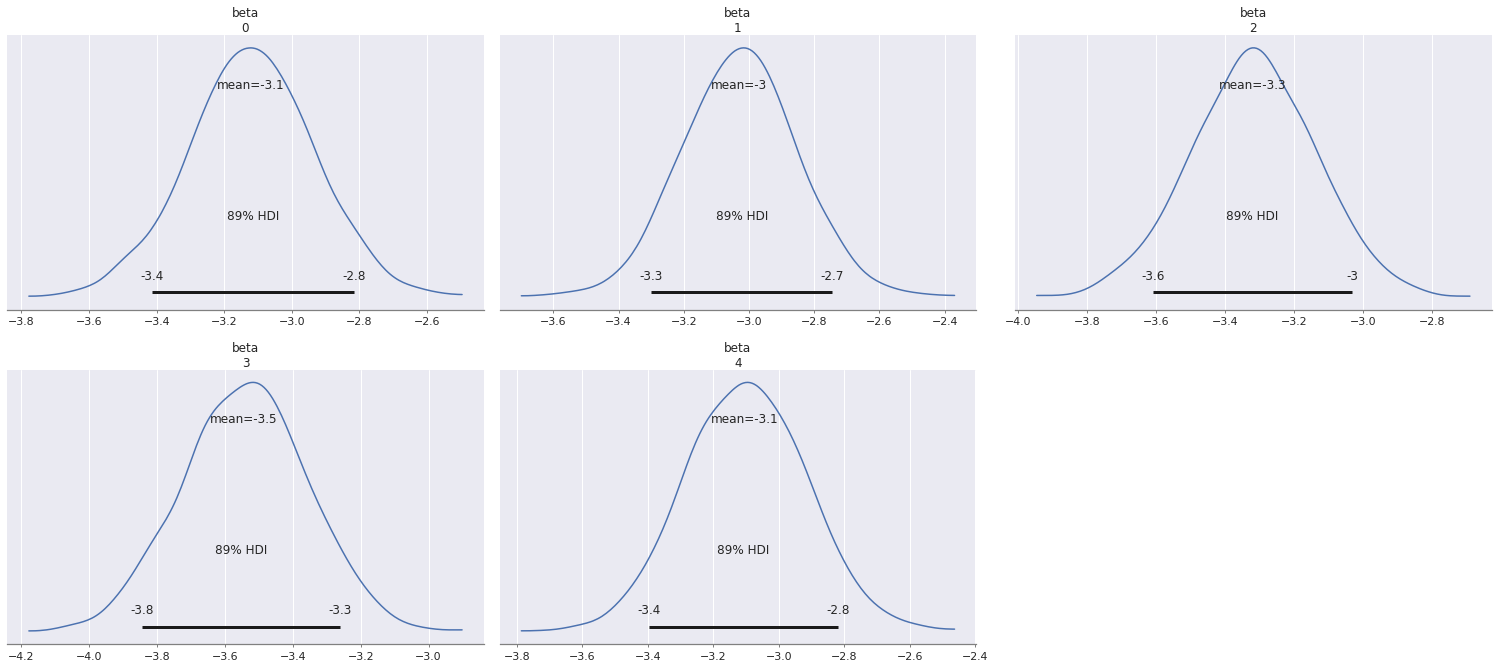

In [48]:
with model:
    az.plot_posterior(trace,var_names=['beta'],hdi_prob=0.89)

In [49]:
def plot_reg(outcome):
    
    fin_beta = trace['beta'][:,1].mean() / scale_outcome
    fin_alpha = trace['alpha'][:,1].mean() / scale_outcome
    swe_beta = trace['beta'][:,0].mean() / scale_outcome
    swe_alpha = trace['alpha'][:,0].mean() / scale_outcome
    nor_beta = trace['beta'][:,2].mean() / scale_outcome
    nor_alpha = trace['alpha'][:,2].mean() / scale_outcome
    den_beta = trace['beta'][:,3].mean() / scale_outcome
    den_alpha = trace['alpha'][:,3].mean() / scale_outcome
    isl_beta = trace['beta'][:,4].mean() / scale_outcome
    isl_alpha = trace['alpha'][:,4].mean() / scale_outcome
    
    
    fin_hdi_kwargs = {'color':'lightblue','alpha':1.0,'label' : 'FIN'}
    swe_hdi_kwargs = {'color' : 'yellow','alpha' : 1.0,'label' : 'SWE'}
    den_hdi_kwargs = {'color' : 'orange','alpha' : 1.0,'label' : 'DNK'}
    nor_hdi_kwargs = {'color' : 'lime','alpha' : 1.0,'label' : 'NOR'}
    isl_hdi_kwargs = {'color' : 'cyan','alpha' : 1.0,'label' : 'ISL'}

    numeric_timeline = df_timeline.reset_index().copy()

    hdi_swe_x = numeric_timeline.loc[numeric_timeline['Country'] == 'SWE']['week_idx']
    hdi_fin_x = numeric_timeline.loc[numeric_timeline['Country'] == 'FIN']['week_idx']
    hdi_den_x = numeric_timeline.loc[numeric_timeline['Country'] == 'DNK']['week_idx']
    hdi_nor_x = numeric_timeline.loc[numeric_timeline['Country'] == 'NOR']['week_idx']
    hdi_isl_x = numeric_timeline.loc[numeric_timeline['Country'] == 'ISL']['week_idx']


    swe_num = numeric_timeline.loc[numeric_timeline['Country'] == 'SWE']
    swe_idx = swe_num.index.values
    hdi_swe_mu = trace['mu'][:,swe_idx]

    fin_num = numeric_timeline.loc[numeric_timeline['Country'] == 'FIN']
    fin_idx = fin_num.index.values
    hdi_fin_mu = trace['mu'][:,fin_idx]

    den_num = numeric_timeline.loc[numeric_timeline['Country'] == 'DNK']
    den_idx = den_num.index.values
    hdi_den_mu = trace['mu'][:,den_idx]

    nor_num = numeric_timeline.loc[numeric_timeline['Country'] == 'NOR']
    nor_idx = nor_num.index.values
    hdi_nor_mu = trace['mu'][:,nor_idx]

    isl_num = numeric_timeline.loc[numeric_timeline['Country'] == 'ISL']
    isl_idx = isl_num.index.values
    hdi_isl_mu = trace['mu'][:,isl_idx]

    fig,axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(18,12))

    plt.suptitle('Nordic countries : mortality trends for [{}]'.format(outcome) +\
                 ' based on weekly death rates Jan 2007 - {}'.format(last_date))


    axes[0,0].plot(hdi_swe_x,
            (trace['alpha'][0,0].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'SWE']['week_idx']) * trace['beta'][:,0].mean()) / scale_outcome,
            '--',color='k',lw=1)



    axes[0,0].scatter(df_timeline.loc[df_timeline['Country'] == 'SWE']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='SWE'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_swe_x,hdi_swe_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,0],fill_kwargs=swe_hdi_kwargs)
    
    axes[0,0].axvline(x.mean(),ls='dashed',color='orange')

    ##

    axes[0,1].plot(hdi_fin_x,
            (trace['alpha'][:,1].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'FIN']['week_idx']) * trace['beta'][:,1].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[0,1].scatter(df_timeline.loc[df_timeline['Country'] == 'FIN']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='FIN'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_fin_x,hdi_fin_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,1],fill_kwargs=fin_hdi_kwargs)
    
    axes[0,1].axvline(x.mean(),ls='dashed',color='orange')


    ##

    axes[0,2].plot(hdi_den_x,
            (trace['alpha'][:,3].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'DNK']['week_idx']) * trace['beta'][:,3].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[0,2].scatter(df_timeline.loc[df_timeline['Country'] == 'DNK']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='DNK'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_den_x,hdi_den_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,2],fill_kwargs=den_hdi_kwargs)
    
    axes[0,2].axvline(x.mean(),ls='dashed',color='orange')


    ##
    axes[1,0].plot(hdi_nor_x,
            (trace['alpha'][:,2].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'NOR']['week_idx']) * trace['beta'][:,2].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[1,0].scatter(df_timeline.loc[df_timeline['Country'] == 'NOR']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='NOR'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_nor_x,hdi_nor_mu / scale_outcome,hdi_prob=0.89,ax=axes[1,0],fill_kwargs=nor_hdi_kwargs)
    
    axes[1,0].axvline(x.mean(),ls='dashed',color='orange')


    ##

    axes[1,1].plot(hdi_isl_x,
            (trace['alpha'][:,4].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'ISL']['week_idx']) * trace['beta'][:,4].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[1,1].scatter(df_timeline.loc[df_timeline['Country'] == 'ISL']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='ISL'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_isl_x,hdi_isl_mu / scale_outcome,hdi_prob=0.89,ax=axes[1,1],fill_kwargs=isl_hdi_kwargs)
    
    axes[1,1].axvline(x.mean(),ls='dashed',color='orange')


    plt.legend(loc='upper center')

    axes[1,0].set_xlabel('week number')
    axes[1,1].set_xlabel('week_number')
    axes[1,2].set_xlabel('week_number')

    axes[0,0].set_title(r'SWE $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(swe_alpha,swe_beta))
    axes[0,1].set_title(r'FIN $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(fin_alpha,fin_beta))
    axes[0,2].set_title(r'DNK $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(den_alpha,den_beta))
    axes[1,0].set_title(r'NOR $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(nor_alpha,nor_beta))
    axes[1,1].set_title(r'ISL $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(isl_alpha,isl_beta))

    axes[1,2].axis('off')

    plt.savefig('nordic_mortality_bayesian_trends_{}.jpg'.format(outcome),format='jpg')



/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/a

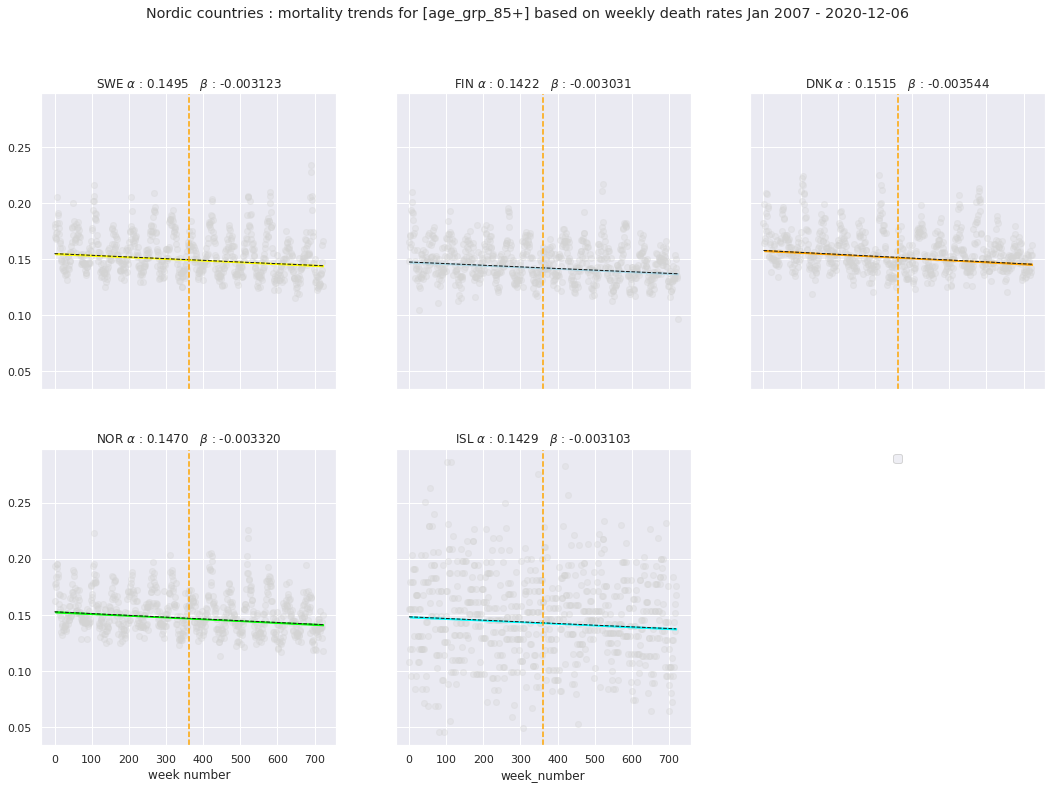

In [50]:
# reported alpha's dont cross at 0 b/c x vals are standardized in calculation : mean at about week 350
plot_reg(outcome)

In [51]:
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
3242,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
3245,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [52]:
age_grps_2020 = df_2020[['Country','age_grp_0-14','age_grp_15-64','age_grp_65-74',
                        'age_grp_75-84','age_grp_85+','all_age_grp']].copy()

age_grps_2020

,Country,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp
3122,SWE,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156
3125,SWE,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498
3128,SWE,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191
3131,SWE,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698
3134,SWE,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287
...,...,...,...,...,...,...,...
3239,ISL,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349
3242,ISL,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374
3245,ISL,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795
3248,ISL,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940


In [53]:
country_age_grps = age_grps_2020.groupby('Country')

swe_2020 = country_age_grps.get_group('SWE')
fin_2020 = country_age_grps.get_group('FIN')
nor_2020 = country_age_grps.get_group('NOR')
den_2020 = country_age_grps.get_group('DNK')
isl_2020 = country_age_grps.get_group('ISL')

swe_means = swe_2020.mean()
swe_2020_ci = swe_2020.quantile([0.055,0.945])
swe_2020_ci = np.abs(swe_2020_ci - swe_means)

fin_means = fin_2020.mean()
fin_2020_ci = fin_2020.quantile([0.055,0.945])
fin_2020_ci = np.abs(fin_2020_ci - fin_means)

nor_means = nor_2020.mean()
nor_2020_ci = nor_2020.quantile([0.055,0.945])
nor_2020_ci = np.abs(nor_2020_ci - nor_means)

den_means = den_2020.mean()
den_2020_ci = den_2020.quantile([0.055,0.945])
den_2020_ci = np.abs(den_2020_ci - den_means)

isl_means = isl_2020.mean()
isl_2020_ci = isl_2020.quantile([0.055,0.945])
isl_2020_ci = np.abs(isl_2020_ci - isl_means)

print (swe_means)
print (swe_2020_ci.T)

swe_2020.describe(percentiles=[0.055,0.945])


age_grp_0-14     0.000224
age_grp_15-64    0.001393
age_grp_65-74    0.012932
age_grp_75-84    0.038542
age_grp_85+      0.153715
all_age_grp      0.008900
dtype: float64
                  0.055     0.945
age_grp_0-14   0.000110  0.000088
age_grp_15-64  0.000210  0.000318
age_grp_65-74  0.001981  0.003691
age_grp_75-84  0.007235  0.012695
age_grp_85+    0.028233  0.052023
all_age_grp    0.001297  0.002740


,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.000224,0.001393,0.012932,0.038542,0.153715,0.008900
std,0.000071,0.000176,0.001768,0.006257,0.027298,0.001373
min,0.000085,0.000931,0.009359,0.030346,0.122472,0.007004
5.5%,0.000113,0.001183,0.010951,0.031308,0.125482,0.007603
50%,0.000227,0.001380,0.012566,0.037338,0.146907,0.008671
94.5%,0.000312,0.001711,0.016623,0.051237,0.205738,0.011640
max,0.000425,0.001869,0.017673,0.056367,0.234149,0.012917


In [54]:
all_means = pd.concat([swe_means,fin_means,nor_means,den_means,isl_means],axis=1)
all_means.columns=['SWE','FIN','NOR','DNK','ISL']
all_means

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000224,0.000160,0.000165,0.000287,0.000228
age_grp_15-64,0.001393,0.002191,0.001506,0.001983,0.001617
age_grp_65-74,0.012932,0.014658,0.012759,0.016317,0.011612
age_grp_75-84,0.038542,0.038822,0.036060,0.041726,0.038810
age_grp_85+,0.153715,0.139495,0.143812,0.149814,0.137745
all_age_grp,0.008900,0.009808,0.007437,0.009206,0.006312


In [55]:
all_cis = np.array([swe_2020_ci.values,fin_2020_ci.values,nor_2020_ci.values,
                    den_2020_ci.values,isl_2020_ci.values])
all_cis.shape

(5, 2, 6)

In [56]:
all_means

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000224,0.000160,0.000165,0.000287,0.000228
age_grp_15-64,0.001393,0.002191,0.001506,0.001983,0.001617
age_grp_65-74,0.012932,0.014658,0.012759,0.016317,0.011612
age_grp_75-84,0.038542,0.038822,0.036060,0.041726,0.038810
age_grp_85+,0.153715,0.139495,0.143812,0.149814,0.137745
all_age_grp,0.008900,0.009808,0.007437,0.009206,0.006312


In [57]:
all_means.mean(axis=1)

age_grp_0-14     0.000213
age_grp_15-64    0.001738
age_grp_65-74    0.013656
age_grp_75-84    0.038792
age_grp_85+      0.144916
all_age_grp      0.008333
dtype: float64

In [58]:
all_means.sub(all_means.mean(axis=1),axis=0)

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000011,-0.000053,-0.000048,0.000074,0.000016
age_grp_15-64,-0.000345,0.000453,-0.000232,0.000245,-0.000121
age_grp_65-74,-0.000724,0.001003,-0.000897,0.002662,-0.002044
age_grp_75-84,-0.000250,0.000030,-0.002732,0.002934,0.000018
age_grp_85+,0.008799,-0.005421,-0.001104,0.004898,-0.007171
all_age_grp,0.000567,0.001475,-0.000896,0.000873,-0.002020


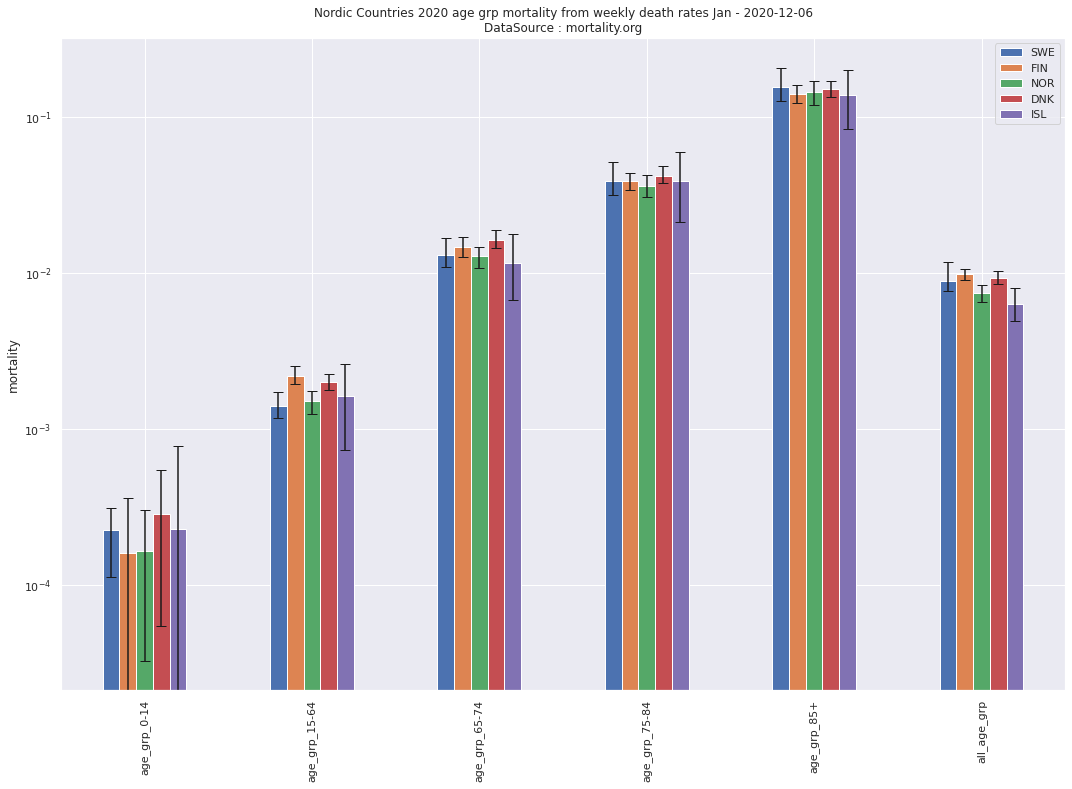

In [59]:
all_means.plot(kind='bar',
               figsize=(18,12),yerr=all_cis,error_kw={'capsize' : 5,'ecolor':'k','label' : '89%'},
               title='Nordic Countries 2020 age grp mortality from weekly death rates Jan - {}\nDataSource : mortality.org'.format(last_date))

plt.ylabel('mortality')
plt.yscale('log')
plt.savefig('nordic_mortality_bar_chart.jpg',format='jpg')

<AxesSubplot:>

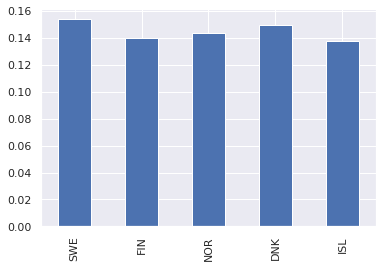

In [60]:
all_means.loc['age_grp_85+'].plot(kind='bar')

<AxesSubplot:>

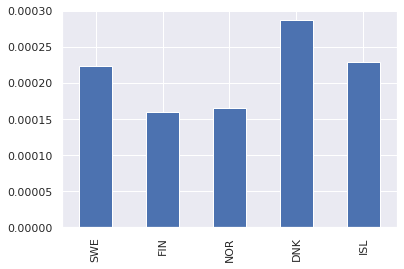

In [61]:
all_means.loc['age_grp_0-14'].plot(kind='bar')

In [62]:
df_2020.loc[df_2020['Country'] == 'SWE']

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
3137,SWE,2020,6,b,9,183,258,493,785,1728,0.000255,0.001481,0.012257,0.035536,0.154071,0.008688,0,0,1
3140,SWE,2020,7,b,5,174,278,532,836,1825,0.000142,0.001408,0.013207,0.038347,0.164081,0.009176,0,0,1
3143,SWE,2020,8,b,3,178,271,537,788,1777,0.000085,0.001440,0.012875,0.038707,0.154660,0.008935,0,0,1
3146,SWE,2020,9,b,10,177,264,533,794,1778,0.000283,0.001432,0.012542,0.038419,0.155837,0.008940,0,0,1
3149,SWE,2020,10,b,7,183,296,557,783,1826,0.000198,0.001481,0.014062,0.040149,0.153678,0.009181,0,0,1


In [63]:
swe_2020_abs = df_2020.loc[df_2020['Country'] == 'SWE'][['0-14','15-64','65-74','75-84','85+']]
fin_2020_abs = df_2020.loc[df_2020['Country'] == 'FIN'][['0-14','15-64','65-74','75-84','85+']]
den_2020_abs = df_2020.loc[df_2020['Country'] == 'DNK'][['0-14','15-64','65-74','75-84','85+']]
nor_2020_abs = df_2020.loc[df_2020['Country'] == 'NOR'][['0-14','15-64','65-74','75-84','85+']]
isl_2020_abs = df_2020.loc[df_2020['Country'] == 'ISL'][['0-14','15-64','65-74','75-84','85+']]

swe_2020_abs

,0-14,15-64,65-74,75-84,85+
3122,7,180,273,548,813
3125,7,194,286,513,889
3128,7,168,292,511,850
3131,11,169,276,535,739
3134,9,170,287,551,830
3137,9,183,258,493,785
3140,5,174,278,532,836
3143,3,178,271,537,788
3146,10,177,264,533,794
3149,7,183,296,557,783


In [64]:
swe_2020_abs.sum()

0-14       379
15-64     8261
65-74    13066
75-84    25666
85+      37593
dtype: int64

In [65]:
mortality_pop = true_pop = 10327589

swe_mortality_2020 = swe_2020_abs.sum().sum() / true_pop / (len(swe_2020_abs) / 52)
swe_mortality_2020

0.008912575497211077

In [66]:
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,ISL,2020,40,b,0,5,3,12,17,37,0.000000,0.001088,0.005009,0.039636,0.135928,0.005349,0,0,1
3242,ISL,2020,41,b,1,6,7,18,19,51,0.000773,0.001305,0.011688,0.059453,0.151919,0.007374,0,0,1
3245,ISL,2020,42,b,0,10,5,12,20,47,0.000000,0.002176,0.008348,0.039636,0.159915,0.006795,0,0,1
3248,ISL,2020,43,b,0,7,9,10,22,48,0.000000,0.001523,0.015027,0.033030,0.175906,0.006940,0,0,1


In [67]:
nordic_age_grp_pop = df_2020.set_index('Country')[['0-14','15-64','65-74','75-84','85+']] /\
df_2020.set_index('Country')[['age_grp_0-14','age_grp_15-64','age_grp_65-74','age_grp_75-84','age_grp_85+']].values

nordic_age_grp_pop *= 52
nordic_age_grp_pop.dropna(inplace=True)
nordic_age_grp_pop

,0-14,15-64,65-74,75-84,85+
Country,,,,,
SWE,1.835386e+06,6.425886e+06,1.094548e+06,721413.369495,264942.841046
SWE,1.835386e+06,6.425886e+06,1.094548e+06,721413.369495,264942.841046
SWE,1.835386e+06,6.425886e+06,1.094548e+06,721413.369495,264942.841046
SWE,1.835386e+06,6.425886e+06,1.094548e+06,721413.369495,264942.841046
SWE,1.835386e+06,6.425886e+06,1.094548e+06,721413.369495,264942.841046
...,...,...,...,...,...
ISL,6.726783e+04,2.390071e+05,3.114391e+04,15743.399119,6503.460991
ISL,6.726783e+04,2.390071e+05,3.114391e+04,15743.399119,6503.460991
ISL,6.726783e+04,2.390071e+05,3.114391e+04,15743.399119,6503.460991


In [68]:
nordic_age_grp_pop = nordic_age_grp_pop.astype(int)
nordic_age_grp_pop

,0-14,15-64,65-74,75-84,85+
Country,,,,,
SWE,1835386,6425886,1094547,721413,264942
SWE,1835386,6425886,1094547,721413,264942
SWE,1835386,6425886,1094547,721413,264942
SWE,1835386,6425886,1094547,721413,264942
SWE,1835386,6425886,1094547,721413,264942
...,...,...,...,...,...
ISL,67267,239007,31143,15743,6503
ISL,67267,239007,31143,15743,6503
ISL,67267,239007,31143,15743,6503


In [69]:
nordic_age_grp_pop = nordic_age_grp_pop.drop_duplicates()
nordic_age_grp_pop

,0-14,15-64,65-74,75-84,85+
Country,,,,,
SWE,1835386,6425886,1094547,721413,264942
FIN,865389,3413510,707349,383308,152635
NOR,926795,3473349,537461,298863,116784
DNK,948400,3710218,640546,399622,125945
ISL,67267,239007,31143,15743,6503


In [70]:
nordic_age_grp_pop.sum(axis=1)

Country
SWE    10342174
FIN     5522191
NOR     5353252
DNK     5824731
ISL      359663
dtype: int64

In [71]:
swe_2020_mortality = swe_2020_abs / nordic_age_grp_pop.loc['SWE'] * 52
fin_2020_mortality = fin_2020_abs / nordic_age_grp_pop.loc['FIN'] * 52
den_2020_mortality = den_2020_abs / nordic_age_grp_pop.loc['DNK'] * 52
nor_2020_mortality = nor_2020_abs / nordic_age_grp_pop.loc['NOR'] * 52
isl_2020_mortality = isl_2020_abs / nordic_age_grp_pop.loc['ISL'] * 52

swe_2020_mortality

,0-14,15-64,65-74,75-84,85+
3122,0.000198,0.001457,0.012970,0.039500,0.159567
3125,0.000198,0.001570,0.013587,0.036977,0.174483
3128,0.000198,0.001360,0.013872,0.036833,0.166829
3131,0.000312,0.001368,0.013112,0.038563,0.145043
3134,0.000255,0.001376,0.013635,0.039717,0.162904
3137,0.000255,0.001481,0.012257,0.035536,0.154071
3140,0.000142,0.001408,0.013207,0.038347,0.164081
3143,0.000085,0.001440,0.012875,0.038707,0.154660
3146,0.000283,0.001432,0.012542,0.038419,0.155838
3149,0.000198,0.001481,0.014062,0.040149,0.153679


In [72]:
print ('SWE',swe_2020_mortality.mean())
print ('FIN',fin_2020_mortality.mean())
print ('DNK',den_2020_mortality.mean())
print ('NOR',nor_2020_mortality.mean())
print ('ISL',isl_2020_mortality.mean())

SWE 0-14     0.000224
15-64    0.001393
65-74    0.012932
75-84    0.038542
85+      0.153716
dtype: float64
FIN 0-14     0.000160
15-64    0.002191
65-74    0.014658
75-84    0.038822
85+      0.139495
dtype: float64
DNK 0-14     0.000287
15-64    0.001983
65-74    0.016317
75-84    0.041726
85+      0.149815
dtype: float64
NOR 0-14     0.000165
15-64    0.001506
65-74    0.012759
75-84    0.036060
85+      0.143812
dtype: float64
ISL 0-14     0.000228
15-64    0.001617
65-74    0.011612
75-84    0.038811
85+      0.137755
dtype: float64


In [73]:
mortality_avg = pd.DataFrame({'SWE' : swe_2020_mortality.mean(),
                             'FIN' : fin_2020_mortality.mean(),
                             'DNK' : den_2020_mortality.mean(),
                             'NOR' : nor_2020_mortality.mean(),
                             'ISL' : isl_2020_mortality.mean()})

mortality_avg

,SWE,FIN,DNK,NOR,ISL
0-14,0.000224,0.000160,0.000287,0.000165,0.000228
15-64,0.001393,0.002191,0.001983,0.001506,0.001617
65-74,0.012932,0.014658,0.016317,0.012759,0.011612
75-84,0.038542,0.038822,0.041726,0.036060,0.038811
85+,0.153716,0.139495,0.149815,0.143812,0.137755


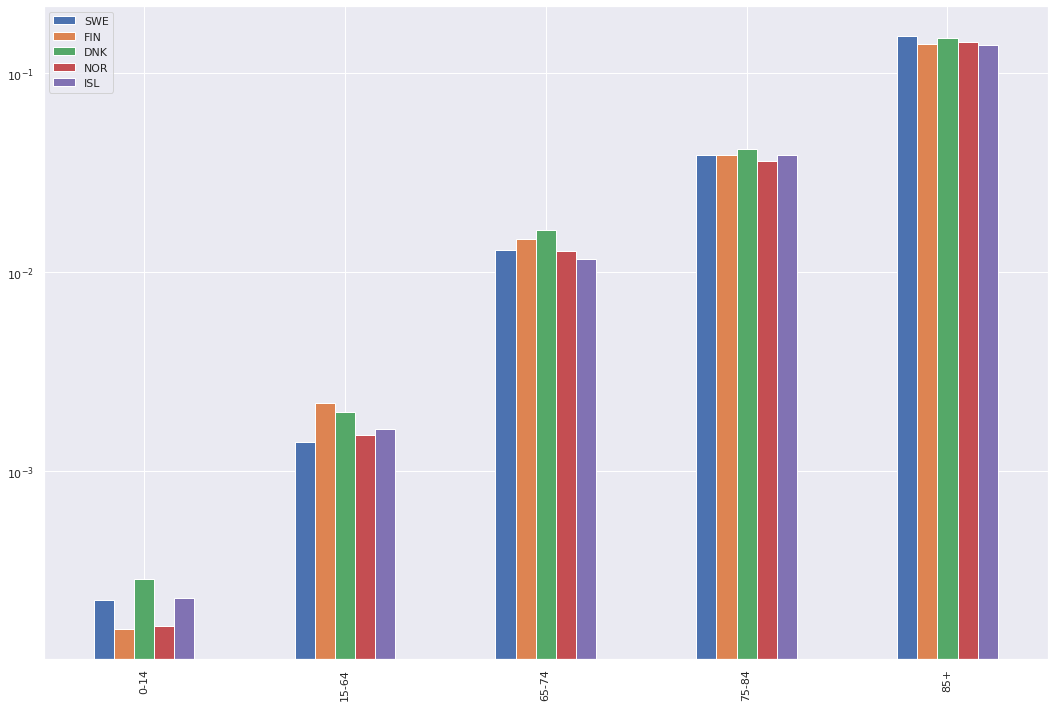

In [74]:
mortality_avg.plot(kind='bar',figsize=(18,12))
plt.yscale('log')

In [75]:
df_2020.head()

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000198,0.001457,0.012970,0.039500,0.159566,0.009156,0,0,1
3125,SWE,2020,2,b,7,194,286,513,889,1889,0.000198,0.001570,0.013587,0.036977,0.174483,0.009498,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000198,0.001360,0.013872,0.036833,0.166828,0.009191,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000312,0.001368,0.013112,0.038563,0.145043,0.008698,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000255,0.001376,0.013635,0.039716,0.162903,0.009287,0,0,1


In [76]:
def trans(x):
    return x

nordic_abs = df_2020.set_index(['Country','Week']).groupby(
    'Country')[['0-14','15-64','65-74','75-84','85+']].transform(trans)

nordic_abs

0-14  15-64  65-74  75-84  85+
Country Week                                
SWE     1        7    180    273    548  813
        2        7    194    286    513  889
        3        7    168    292    511  850
        4       11    169    276    535  739
        5        9    170    287    551  830
...            ...    ...    ...    ...  ...
ISL     40       0      5      3     12   17
        41       1      6      7     18   19
        42       0     10      5     12   20
        43       0      7      9     10   22
        44       0      4     12     18   21

[236 rows x 5 columns]

In [77]:
nordic_abs.sum(axis=1).groupby('Country').sum()

Country
DNK    49498
FIN    49993
ISL     1921
NOR    36750
SWE    84965
dtype: int64

In [78]:
std_pop = nordic_age_grp_pop.loc['DNK']
std_pop

0-14      948400
15-64    3710218
65-74     640546
75-84     399622
85+       125945
Name: DNK, dtype: int64

In [79]:
# https://www.healthknowledge.org.uk/e-learning/epidemiology/specialists/standardisation

std_abs_deaths = mortality_avg.mul(std_pop,axis=0)
std_abs_deaths

,SWE,FIN,DNK,NOR,ISL
0-14,212.160948,151.968036,271.916667,156.310835,216.612495
15-64,5167.269822,8129.449500,7355.833333,5587.021886,5999.115552
65-74,8283.629549,9389.360245,10452.000000,8172.768247,7438.099290
75-84,15402.305068,15514.003816,16674.666667,14410.369614,15509.689513
85+,19359.726218,17568.709334,18868.416667,18112.376521,17349.503446


In [80]:
total_age_adj_deaths = std_abs_deaths.sum()
total_age_adj_deaths

SWE    48425.091606
FIN    50753.490930
DNK    53622.833333
NOR    46438.847102
ISL    46513.020296
dtype: float64

In [81]:
age_adj_mortality = total_age_adj_deaths / (std_pop.sum())
age_adj_mortality

SWE    0.008314
FIN    0.008713
DNK    0.009206
NOR    0.007973
ISL    0.007985
dtype: float64

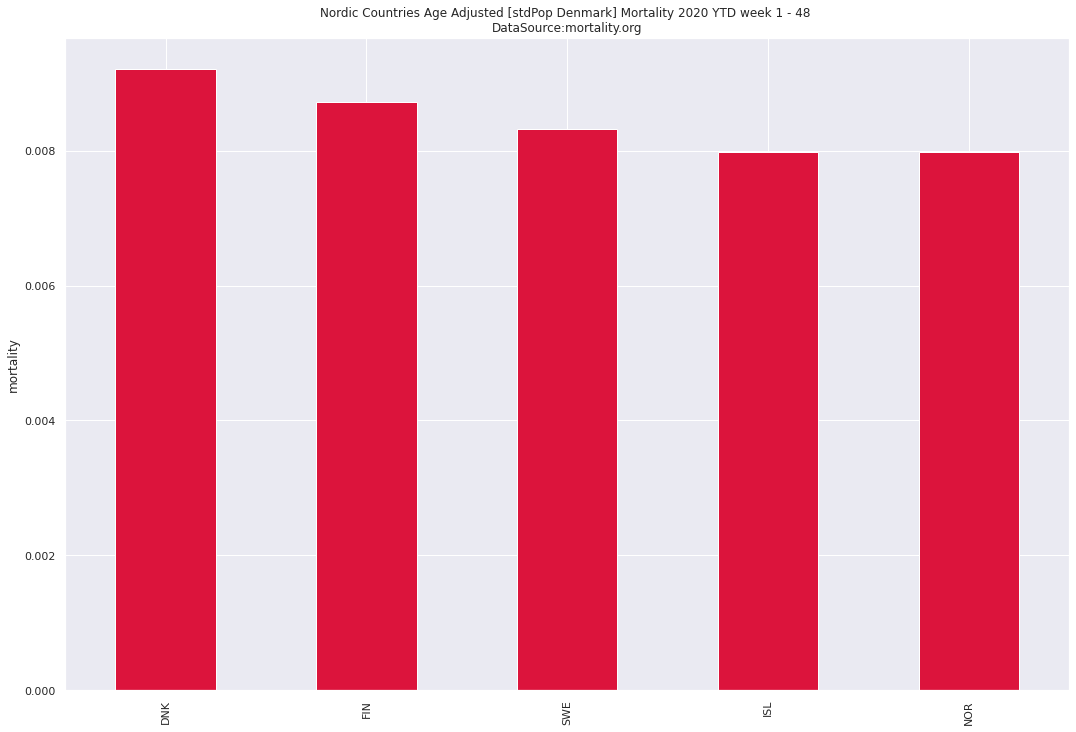

In [82]:
title = 'Nordic Countries Age Adjusted [stdPop Denmark] Mortality 2020 YTD week 1 - {} \nDataSource:mortality.org\
'.format(len(swe_2020))
age_adj_mortality.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),color='crimson',title=title)
plt.ylabel('mortality')
plt.savefig('nordic_age_adj_mortality.jpg',format='jpg')

<AxesSubplot:>

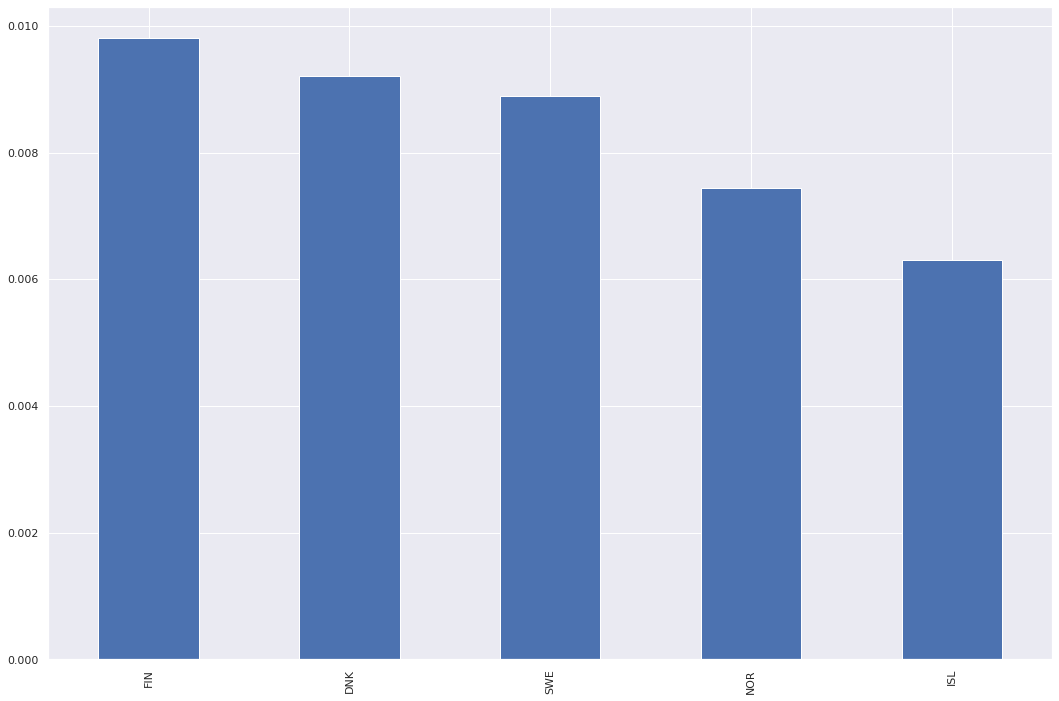

In [83]:
all_means.loc['all_age_grp'].sort_values(ascending=False).plot(kind='bar',figsize=(18,12))

In [84]:
### new ###

xl = pd.ExcelFile('mortality_org.xlsx')


In [85]:
xl.sheet_names

['Description',
 'AUS2',
 'AUT',
 'BEL',
 'BGR',
 'CAN',
 'CHE',
 'CHL',
 'CZE',
 'DEUTNP',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRATNP',
 'GBRTENW',
 'GBR_NIR',
 'GBR_SCO',
 'GRC',
 'HRV',
 'HUN',
 'ISL',
 'ISR',
 'ITA',
 'KOR',
 'LTU',
 'LUX',
 'LVA',
 'NLD',
 'NOR',
 'NZL_NP',
 'POL',
 'PRT',
 'RUS',
 'SVK',
 'SVN',
 'SWE',
 'TWN',
 'USA']

In [86]:
df_all_countries = pd.DataFrame()

abbs = xl.sheet_names[1:]

for a in abbs:
    temp = pd.read_excel('mortality_org.xlsx',sheet_name=a,skiprows=2)
    
    df_all_countries = pd.concat([df_all_countries,temp],axis=0)

In [87]:
df_all_countries

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,0-14.1,15-64.1,65-74.1,75-84.1,85+.1,Total.1,Split,SplitSex,Forecast
0,AUS2,2015,1,m,5.800872,202.199128,206.000000,382.000000,393.000000,1189.000000,0.000130,0.001337,0.010821,0.040008,0.118851,0.005225,1,0,0
1,AUS2,2015,1,f,6.758007,145.241993,161.000000,299.000000,670.000000,1282.000000,0.000160,0.000955,0.008226,0.026646,0.117591,0.005558,1,0,0
2,AUS2,2015,1,b,12.558879,347.441121,367.000000,681.000000,1063.000000,2471.000000,0.000145,0.001146,0.009506,0.032789,0.118053,0.005393,1,0,0
3,AUS2,2015,2,m,3.205745,155.794255,195.000000,337.000000,401.000000,1092.000000,0.000072,0.001030,0.010243,0.035295,0.121270,0.004799,1,0,0
4,AUS2,2015,2,f,5.181139,137.818861,143.000000,295.000000,654.000000,1235.000000,0.000123,0.000907,0.007307,0.026289,0.114782,0.005354,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,USA,2020,46,f,159.963518,4608.693523,4656.929886,6516.747616,10631.200325,26573.534869,0.000283,0.002249,0.013937,0.036681,0.129237,0.008282,1,1,1
1229,USA,2020,46,b,368.474992,12257.525008,10977.749153,13606.311469,17663.939378,54874.000000,0.000319,0.002993,0.017521,0.042969,0.137218,0.008680,1,0,1
1230,USA,2020,47,m,124.219601,5456.654318,5039.240545,5652.118199,5606.814921,21879.047585,0.000210,0.002668,0.017235,0.040665,0.120661,0.007027,1,1,1
1231,USA,2020,47,f,95.297415,3287.828665,3712.713322,5195.443410,8475.669602,20766.952415,0.000169,0.001604,0.011111,0.029244,0.103034,0.006472,1,1,1


In [88]:
df_all_countries_2020 = df_all_countries.loc[(df_all_countries['Year'] == 2020) & (df_all_countries['Sex'] == 'b')]
df_all_countries_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,0-14.1,15-64.1,65-74.1,75-84.1,85+.1,Total.1,Split,SplitSex,Forecast
782,AUS2,2020,1,b,7.394232,280.605768,415.000000,710.000000,1102.000000,2515.0,0.000081,0.000885,0.009230,0.028437,0.108520,0.005147,1,0,1
785,AUS2,2020,2,b,9.627197,333.372803,441.000000,678.000000,1057.000000,2519.0,0.000105,0.001051,0.009808,0.027155,0.104088,0.005156,1,0,1
788,AUS2,2020,3,b,7.915334,300.084666,420.000000,698.000000,1080.000000,2506.0,0.000087,0.000946,0.009341,0.027956,0.106353,0.005129,1,0,1
791,AUS2,2020,4,b,7.124396,294.875604,387.000000,733.000000,1143.000000,2565.0,0.000078,0.000930,0.008607,0.029358,0.112557,0.005250,1,0,1
794,AUS2,2020,5,b,8.240879,304.759121,410.000000,693.000000,1117.000000,2533.0,0.000090,0.000961,0.009119,0.027756,0.109997,0.005184,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,USA,2020,43,b,436.420735,13856.579265,11254.739320,13949.625425,18109.635254,57607.0,0.000378,0.003384,0.017963,0.044054,0.140681,0.009112,1,0,1
1223,USA,2020,44,b,433.807437,13643.192563,11278.124982,13978.610656,18147.264362,57481.0,0.000376,0.003332,0.018001,0.044145,0.140973,0.009092,1,0,1
1226,USA,2020,45,b,426.838643,13568.161357,11530.170444,14291.007033,18552.822523,58369.0,0.000370,0.003313,0.018403,0.045132,0.144123,0.009233,1,0,1
1229,USA,2020,46,b,368.474992,12257.525008,10977.749153,13606.311469,17663.939378,54874.0,0.000319,0.002993,0.017521,0.042969,0.137218,0.008680,1,0,1


In [89]:
latest_week = df_all_countries_2020.groupby('Country')['Week'].max().max()
latest_week

49

In [90]:
df_all_countries_2020 = df_all_countries_2020.rename(columns={'0-14.1': 'age_grp_0-14','15-64.1' : 'age_grp_15-64',
                      '65-74.1' : 'age_grp_65-74', '75-84.1' : 'age_grp_75-84',
                      '85+.1' : 'age_grp_85+','Total.1' : 'all_age_grp'})

df_all_countries_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
782,AUS2,2020,1,b,7.394232,280.605768,415.000000,710.000000,1102.000000,2515.0,0.000081,0.000885,0.009230,0.028437,0.108520,0.005147,1,0,1
785,AUS2,2020,2,b,9.627197,333.372803,441.000000,678.000000,1057.000000,2519.0,0.000105,0.001051,0.009808,0.027155,0.104088,0.005156,1,0,1
788,AUS2,2020,3,b,7.915334,300.084666,420.000000,698.000000,1080.000000,2506.0,0.000087,0.000946,0.009341,0.027956,0.106353,0.005129,1,0,1
791,AUS2,2020,4,b,7.124396,294.875604,387.000000,733.000000,1143.000000,2565.0,0.000078,0.000930,0.008607,0.029358,0.112557,0.005250,1,0,1
794,AUS2,2020,5,b,8.240879,304.759121,410.000000,693.000000,1117.000000,2533.0,0.000090,0.000961,0.009119,0.027756,0.109997,0.005184,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,USA,2020,43,b,436.420735,13856.579265,11254.739320,13949.625425,18109.635254,57607.0,0.000378,0.003384,0.017963,0.044054,0.140681,0.009112,1,0,1
1223,USA,2020,44,b,433.807437,13643.192563,11278.124982,13978.610656,18147.264362,57481.0,0.000376,0.003332,0.018001,0.044145,0.140973,0.009092,1,0,1
1226,USA,2020,45,b,426.838643,13568.161357,11530.170444,14291.007033,18552.822523,58369.0,0.000370,0.003313,0.018403,0.045132,0.144123,0.009233,1,0,1
1229,USA,2020,46,b,368.474992,12257.525008,10977.749153,13606.311469,17663.939378,54874.0,0.000319,0.002993,0.017521,0.042969,0.137218,0.008680,1,0,1


In [91]:
country_max_week = df_all_countries_2020.groupby('Country')['Week'].max()
country_max_week

Country
AUS2       34
AUT        48
BEL        47
BGR        48
CAN        38
CHE        47
CHL        48
CZE        44
DEUTNP     45
DNK        48
ESP        47
EST        48
FIN        48
FRATNP     47
GBRTENW    48
GBR_NIR    48
GBR_SCO    49
GRC        43
HRV        44
HUN        45
ISL        44
ISR        45
ITA        40
KOR        40
LTU        47
LUX        44
LVA        49
NLD        48
NOR        48
NZL_NP     47
POL        44
PRT        47
SVK        44
SVN        47
SWE        48
TWN        39
USA        47
Name: Week, dtype: int64

In [92]:
recent_countries = country_max_week.loc[country_max_week >= latest_week - 2].index.values
recent_countries

array(['AUT', 'BEL', 'BGR', 'CHE', 'CHL', 'DNK', 'ESP', 'EST', 'FIN',
       'FRATNP', 'GBRTENW', 'GBR_NIR', 'GBR_SCO', 'LTU', 'LVA', 'NLD',
       'NOR', 'NZL_NP', 'PRT', 'SVN', 'SWE', 'USA'], dtype=object)

In [93]:
'ITA' in recent_countries

False

In [94]:
df_all_countries_2020 = df_all_countries_2020.set_index('Country')


In [95]:
df_all_countries_2020 = df_all_countries_2020.loc[recent_countries]



#!!!!#
#df_all_countries_2020 = df_all_countries_2020.loc[df_all_countries_2020['Week'] <=26]
#!!!!#

latest_week = df_all_countries_2020.groupby('Country')['Week'].max().max()
print ('latest_week',latest_week)

df_all_countries_2020

latest_week 49


,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
Country,,,,,,,,,,,,,,,,,,
AUT,2020,1,b,1.000000,220.000000,221.000000,482.000000,687.000000,1611.0,0.000041,0.001958,0.013396,0.040033,0.157436,0.009486,0,0,1
AUT,2020,2,b,8.000000,231.000000,261.000000,490.000000,712.000000,1702.0,0.000326,0.002056,0.015821,0.040697,0.163165,0.010022,0,0,1
AUT,2020,3,b,12.000000,223.000000,272.000000,537.000000,753.000000,1797.0,0.000489,0.001985,0.016488,0.044601,0.172561,0.010582,0,0,1
AUT,2020,4,b,13.000000,259.000000,256.000000,515.000000,737.000000,1780.0,0.000529,0.002305,0.015518,0.042773,0.168895,0.010482,0,0,1
AUT,2020,5,b,9.000000,226.000000,277.000000,591.000000,844.000000,1947.0,0.000367,0.002011,0.016791,0.049086,0.193415,0.011465,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,2020,43,b,436.420735,13856.579265,11254.739320,13949.625425,18109.635254,57607.0,0.000378,0.003384,0.017963,0.044054,0.140681,0.009112,1,0,1
USA,2020,44,b,433.807437,13643.192563,11278.124982,13978.610656,18147.264362,57481.0,0.000376,0.003332,0.018001,0.044145,0.140973,0.009092,1,0,1
USA,2020,45,b,426.838643,13568.161357,11530.170444,14291.007033,18552.822523,58369.0,0.000370,0.003313,0.018403,0.045132,0.144123,0.009233,1,0,1


In [96]:
all_age_grp_pop = df_all_countries_2020[['0-14','15-64','65-74','75-84','85+']] /\
df_all_countries_2020[['age_grp_0-14','age_grp_15-64','age_grp_65-74','age_grp_75-84','age_grp_85+']].values

all_age_grp_pop *= 52
all_age_grp_pop.dropna(inplace=True)

all_age_grp_pop.dropna(inplace=True)
all_age_grp_pop = all_age_grp_pop.astype(int)
all_age_grp_pop = all_age_grp_pop.drop_duplicates()
all_age_grp_pop

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,1276711,5843186,857839,626090,226910
BEL,1933092,7338243,1186346,704191,336143
BGR,1000370,4433020,878440,478851,144945
CHE,1296534,5654022,840213,555781,231491
CHL,3686125,12978190,1425237,704496,277494
DNK,948400,3710218,640546,399622,125945
ESP,6760996,30776874,4668966,3071921,1580252
EST,215810,830495,142302,90245,35278
FIN,865389,3413510,707349,383308,152635


In [97]:
all_age_grp_pop.sum(axis=1)

Country
AUT          8830736
BEL         11498015
BGR          6935626
CHE          8578041
CHL         19071542
DNK          5824731
ESP         46859009
EST          1314130
FIN          5522191
FRATNP      65023079
GBRTENW     59501214
GBR_NIR      1899410
GBR_SCO      5441226
LTU          2789174
LVA          1914319
NLD         17299865
NOR          5353252
NZL_NP       4984380
PRT         10224381
SVN          2068965
SWE         10342174
USA        328743567
dtype: int64

In [98]:
all_age_grp_abs_deaths = df_all_countries_2020[['0-14','15-64','65-74','75-84','85+']]
deaths_YTD = all_age_grp_abs_deaths.sum(axis=1).groupby('Country').sum()
deaths_YTD

Country
AUT          80074.0
BEL         111647.0
BGR         106787.0
CHE          63205.0
CHL         116135.0
DNK          49498.0
ESP         443826.0
EST          14395.0
FIN          49993.0
FRATNP      575776.0
GBRTENW     554910.0
GBR_NIR      16030.0
GBR_SCO      59836.0
LTU          36345.0
LVA          25994.0
NLD         152077.0
NOR          36750.0
NZL_NP       29227.0
PRT         107748.0
SVN          19770.0
SWE          84965.0
USA        2861061.0
dtype: float64

In [99]:
all_countries_mortality_age_grp = \
df_all_countries_2020[['age_grp_0-14','age_grp_15-64','age_grp_65-74','age_grp_75-84','age_grp_85+']].groupby('Country').mean()

all_countries_mortality_age_grp.columns = all_age_grp_pop.columns
all_countries_mortality_age_grp

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,0.000276,0.002040,0.015423,0.040611,0.157851
BEL,0.000119,0.002208,0.016607,0.046631,0.162283
BGR,0.000482,0.005286,0.031831,0.073386,0.197778
CHE,0.000317,0.001392,0.011116,0.032858,0.147075
CHL,0.000430,0.002462,0.017649,0.046421,0.124033
DNK,0.000287,0.001983,0.016317,0.041726,0.149814
ESP,0.000265,0.002030,0.014219,0.041292,0.147787
EST,0.000196,0.003757,0.020471,0.048485,0.145801
FIN,0.000160,0.002191,0.014658,0.038822,0.139495


In [100]:
(all_age_grp_pop * all_countries_mortality_age_grp).sum(axis=1).astype(int)

Country
AUT          86746
BEL         123524
BGR         115685
CHE          69928
CHL         125812
DNK          53622
ESP         491041
EST          15594
FIN          54158
FRATNP      637028
GBRTENW     601152
GBR_NIR      17365
GBR_SCO      63499
LTU          40211
LVA          27585
NLD         164749
NOR          39812
NZL_NP       32336
PRT         119210
SVN          21873
SWE          92045
USA        3165429
dtype: int64

In [101]:
all_abs_deaths = all_age_grp_abs_deaths.groupby('Country').sum()
all_abs_deaths

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,324.871842,11003.128158,12212.812261,23470.221905,33062.965834
BEL,208.000000,14647.000000,17807.000000,29680.000000,49305.000000
BGR,445.000000,21631.000000,25811.000000,32438.000000,26462.000000
CHE,371.000000,7113.000000,8442.000000,16506.000000,30773.000000
CHL,1463.000000,29494.000000,23219.000000,30188.000000,31771.000000
DNK,251.000000,6790.000000,9648.000000,15392.000000,17417.000000
ESP,1622.370573,56464.007000,60005.396765,114648.708146,211085.517516
EST,39.000000,2880.000000,2689.000000,4039.000000,4748.000000
FIN,128.000000,6904.000000,9571.000000,13736.000000,19654.000000


In [102]:
all_abs_deaths.sum(axis=1)

Country
AUT          80074.0
BEL         111647.0
BGR         106787.0
CHE          63205.0
CHL         116135.0
DNK          49498.0
ESP         443826.0
EST          14395.0
FIN          49993.0
FRATNP      575776.0
GBRTENW     554910.0
GBR_NIR      16030.0
GBR_SCO      59836.0
LTU          36345.0
LVA          25994.0
NLD         152077.0
NOR          36750.0
NZL_NP       29227.0
PRT         107748.0
SVN          19770.0
SWE          84965.0
USA        2861061.0
dtype: float64

In [103]:
all_YTD_mortality = all_abs_deaths / (all_age_grp_pop * ((latest_week - 1)/52))
all_YTD_mortality

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,0.000276,0.002040,0.015423,0.040611,0.157852
BEL,0.000117,0.002162,0.016261,0.045660,0.158902
BGR,0.000482,0.005286,0.031831,0.073386,0.197780
CHE,0.000310,0.001363,0.010885,0.032174,0.144012
CHL,0.000430,0.002462,0.017649,0.046421,0.124034
DNK,0.000287,0.001983,0.016317,0.041726,0.149815
ESP,0.000260,0.001988,0.013923,0.040432,0.144709
EST,0.000196,0.003757,0.020471,0.048486,0.145804
FIN,0.000160,0.002191,0.014658,0.038822,0.139495


In [104]:
all_std_pop = all_age_grp_pop.loc['DNK']
all_std_pop

0-14      948400
15-64    3710218
65-74     640546
75-84     399622
85+       125945
Name: DNK, dtype: int64

In [105]:
all_std_abs_age_grp_deaths = all_std_pop * all_countries_mortality_age_grp
all_std_abs_age_grp_deaths

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,261.440459,7568.815556,9879.212246,16229.004830,19880.604999
BEL,112.903589,8193.349834,10637.384283,18634.934936,20438.695433
BGR,457.038687,19612.743979,20389.410362,29326.809750,24909.187389
CHE,300.252702,5164.166264,7120.518134,13130.834927,18523.409199
CHL,407.781779,9134.421859,11304.950435,18550.984698,15621.382672
DNK,271.916488,7355.832097,10451.990893,16674.645499,18868.268329
ESP,251.788796,7530.990531,9108.048127,16501.140928,18613.079955
EST,185.671313,13938.518277,13112.644928,19375.804596,18362.914678
FIN,151.967922,8129.447313,9389.350260,15514.000153,17568.641207


In [106]:
all_std_abs_age_grp_deaths.sum(axis=1)

Country
AUT        53819.078089
BEL        58017.268075
BGR        94695.190166
CHE        44239.181225
CHL        55019.521443
DNK        53622.653306
ESP        52005.048338
EST        64975.553791
FIN        50753.406855
FRATNP     48363.953461
GBRTENW    58297.638767
GBR_NIR    59122.089667
GBR_SCO    67926.299062
LTU        79030.081520
LVA        79557.324722
NLD        55745.882492
NOR        46438.770913
NZL_NP     45515.323886
PRT        55895.528736
SVN        57249.719398
SWE        48425.018070
USA        63003.479253
dtype: float64

In [107]:
all_std_pop.sum()

5824731

In [108]:
all_std_mortality = all_std_abs_age_grp_deaths.sum(axis=1) / all_std_pop.sum()
all_std_mortality

Country
AUT        0.009240
BEL        0.009961
BGR        0.016257
CHE        0.007595
CHL        0.009446
DNK        0.009206
ESP        0.008928
EST        0.011155
FIN        0.008713
FRATNP     0.008303
GBRTENW    0.010009
GBR_NIR    0.010150
GBR_SCO    0.011662
LTU        0.013568
LVA        0.013659
NLD        0.009571
NOR        0.007973
NZL_NP     0.007814
PRT        0.009596
SVN        0.009829
SWE        0.008314
USA        0.010817
dtype: float64

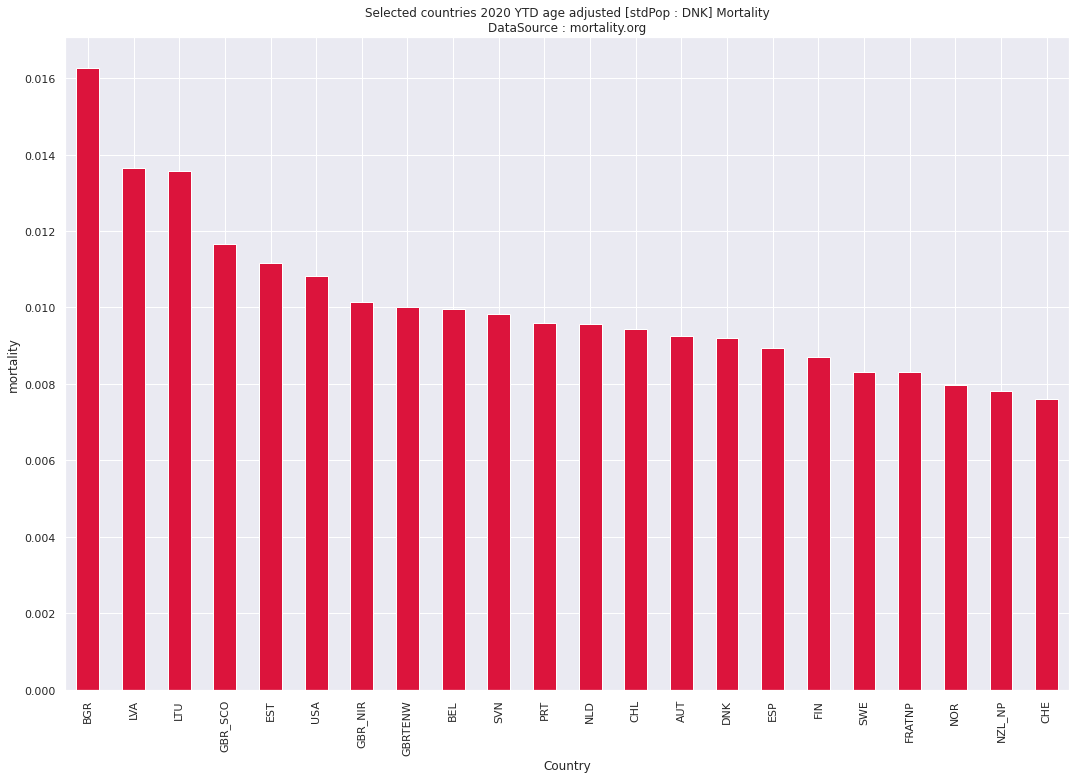

In [109]:
title = "Selected countries 2020 YTD age adjusted [stdPop : DNK] Mortality\nDataSource : mortality.org"
all_std_mortality.sort_values(ascending=False).plot(kind='bar',color='crimson',
                                                    figsize=(18,12),title=title)
plt.ylabel('mortality')
plt.savefig('age_adj_mortality_selected_countries.jpg',format='jpg')

In [110]:
all_non_age_adj_mortality = all_abs_deaths.sum(axis=1) / (all_age_grp_pop.sum(axis=1) * ((latest_week -1)/52))
all_non_age_adj_mortality

Country
AUT        0.009823
BEL        0.010519
BGR        0.016680
CHE        0.007982
CHL        0.006597
DNK        0.009206
ESP        0.010261
EST        0.011867
FIN        0.009808
FRATNP     0.009593
GBRTENW    0.010103
GBR_NIR    0.009143
GBR_SCO    0.011913
LTU        0.014117
LVA        0.014710
NLD        0.009523
NOR        0.007437
NZL_NP     0.006352
PRT        0.011417
SVN        0.010352
SWE        0.008900
USA        0.009428
dtype: float64

<AxesSubplot:xlabel='Country'>

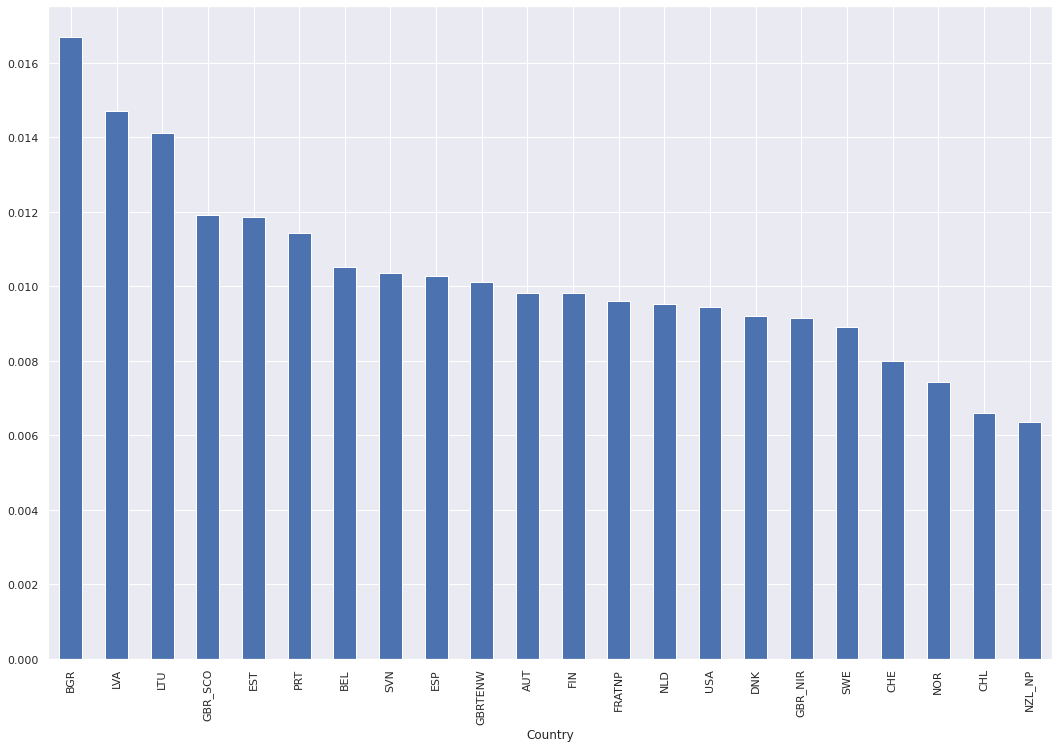

In [111]:
all_non_age_adj_mortality.sort_values(ascending=False).plot(kind='bar',figsize=(18,12))

In [112]:
latest_week

49

In [113]:
all_age_grp_pop

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,1276711,5843186,857839,626090,226910
BEL,1933092,7338243,1186346,704191,336143
BGR,1000370,4433020,878440,478851,144945
CHE,1296534,5654022,840213,555781,231491
CHL,3686125,12978190,1425237,704496,277494
DNK,948400,3710218,640546,399622,125945
ESP,6760996,30776874,4668966,3071921,1580252
EST,215810,830495,142302,90245,35278
FIN,865389,3413510,707349,383308,152635


In [114]:
all_age_pct = all_age_grp_pop.div(all_age_grp_pop.sum(axis=1),axis=0)
all_age_pct

,0-14,15-64,65-74,75-84,85+
Country,,,,,
AUT,0.144576,0.661687,0.097142,0.070899,0.025695
BEL,0.168124,0.638218,0.103178,0.061245,0.029235
BGR,0.144236,0.639167,0.126656,0.069042,0.020899
CHE,0.151146,0.659127,0.097949,0.064791,0.026986
CHL,0.193279,0.680500,0.074731,0.036940,0.014550
DNK,0.162823,0.636977,0.109970,0.068608,0.021622
ESP,0.144284,0.656797,0.099639,0.065557,0.033724
EST,0.164223,0.631973,0.108286,0.068673,0.026845
FIN,0.156711,0.618144,0.128092,0.069412,0.027640


In [115]:
all_age_pct.loc[['SWE','FIN','DNK','NOR','ISL']].plot(kind='bar',stacked=True,figsize=(18,12))
_= plt.yticks(np.arange(0,1.1,0.1))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ISL'], dtype='object', name='Country'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
all_age_pct.plot(kind='bar',stacked=True,figsize=(18,12))
_= plt.yticks(np.arange(0,1.1,0.1))

In [ ]:
(all_std_abs_age_grp_deaths.div(all_std_abs_age_grp_deaths.sum(axis=1),axis=0)).plot(
    kind='bar',stacked=True,figsize=(18,12))

all_deaths_age_pct = all_std_abs_age_grp_deaths.div(all_std_abs_age_grp_deaths.sum(axis=1),axis=0)
all_deaths_age_pct

In [ ]:
all_abs_deaths

In [ ]:
all_age_grp_pop

In [ ]:
all_abs_deaths_pct = all_abs_deaths.div(all_abs_deaths.sum(axis=1),axis=0)

title = 'Selected Countries : pct deaths per age grp of all deaths'
all_abs_deaths_pct.plot(kind='bar',stacked=True,figsize=(18,12),title=title)
all_abs_deaths_pct